# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

def train_model_and_return_performances(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)
    
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

def train_model_and_return_performances(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)
    
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    statsToReturn = []
    
    for k in ['error(train)', 'error(valid)', 'acc(train)', 'acc(valid)']:
        statsToReturn.append(stats[1:, keys[k]])
    return statsToReturn

def train_model_return_test_set_performance(
    model, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, notebook=True):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)
    
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    test_set_stats = optimiser.eval_monitors(test_data, '(test)')
    print(test_set_stats)
#     statsToReturn = []
    
#     for k in ['error(train)', 'error(valid)', 'acc(train)', 'acc(valid)']:
#         statsToReturn.append(stats[1:, keys[k]])
    
    return test_set_stats

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.layers import DropoutLayer
from mlp.penalties import L1Penalty, L2Penalty

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fcd78206d30>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fcd78206790>)


## Exploring the effect of varying the number of hidden units in a 2 layer model (1 hidden layer):

The cells below show the differences in validation set performances obtained when varying the number of hidden units.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.4s to complete
    error(train)=1.23e+00, acc(train)=6.59e-01, error(valid)=1.24e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.3s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.10e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.3s to complete
    error(train)=9.94e-01, acc(train)=7.18e-01, error(valid)=1.02e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.2s to complete
    error(train)=9.35e-01, acc(train)=7.30e-01, error(valid)=9.58e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.4s to complete
    error(train)=8.85e-01, acc(train)=7.42e-01, error(valid)=9.14e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.4s to complete
    error(train)=8.50e-01, acc(train)=7.51e-01, error(valid)=8.85e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.4s to complete
    error(train)=8.32e-01, acc(train)=7.51e-01, error(valid)=8.67e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.3s to complete
    error(train)=7.92e-01, acc(train)=7.65e-01, error(valid)=8.33e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.3s to complete
    error(train)=7.74e-01, acc(train)=7.68e-01, error(valid)=8.15e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.4s to complete
    error(train)=7.57e-01, acc(train)=7.71e-01, error(valid)=8.00e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.4s to complete
    error(train)=7.41e-01, acc(train)=7.77e-01, error(valid)=7.91e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.2s to complete
    error(train)=7.26e-01, acc(train)=7.81e-01, error(valid)=7.74e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.4s to complete
    error(train)=7.18e-01, acc(train)=7.83e-01, error(valid)=7.69e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.4s to complete
    error(train)=7.15e-01, acc(train)=7.83e-01, error(valid)=7.71e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.5s to complete
    error(train)=7.05e-01, acc(train)=7.85e-01, error(valid)=7.62e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.7s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.57e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.4s to complete
    error(train)=6.93e-01, acc(train)=7.87e-01, error(valid)=7.54e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.5s to complete
    error(train)=6.79e-01, acc(train)=7.93e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.4s to complete
    error(train)=6.76e-01, acc(train)=7.92e-01, error(valid)=7.41e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.4s to complete
    error(train)=6.80e-01, acc(train)=7.91e-01, error(valid)=7.48e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.6s to complete
    error(train)=6.65e-01, acc(train)=7.95e-01, error(valid)=7.35e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.5s to complete
    error(train)=6.64e-01, acc(train)=7.95e-01, error(valid)=7.37e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.3s to complete
    error(train)=6.57e-01, acc(train)=7.97e-01, error(valid)=7.29e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.4s to complete
    error(train)=6.58e-01, acc(train)=7.96e-01, error(valid)=7.32e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.4s to complete
    error(train)=6.48e-01, acc(train)=7.99e-01, error(valid)=7.25e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.5s to complete
    error(train)=6.52e-01, acc(train)=7.96e-01, error(valid)=7.34e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.3s to complete
    error(train)=6.43e-01, acc(train)=8.00e-01, error(valid)=7.23e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.5s to complete
    error(train)=6.36e-01, acc(train)=8.01e-01, error(valid)=7.19e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.5s to complete
    error(train)=6.45e-01, acc(train)=7.98e-01, error(valid)=7.28e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.5s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=7.17e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.5s to complete
    error(train)=6.32e-01, acc(train)=8.02e-01, error(valid)=7.19e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.6s to complete
    error(train)=6.27e-01, acc(train)=8.03e-01, error(valid)=7.15e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.5s to complete
    error(train)=6.28e-01, acc(train)=8.02e-01, error(valid)=7.15e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.6s to complete
    error(train)=6.23e-01, acc(train)=8.06e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.5s to complete
    error(train)=6.19e-01, acc(train)=8.07e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.4s to complete
    error(train)=6.12e-01, acc(train)=8.08e-01, error(valid)=7.06e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.6s to complete
    error(train)=6.09e-01, acc(train)=8.10e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.5s to complete
    error(train)=6.09e-01, acc(train)=8.10e-01, error(valid)=7.06e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.5s to complete
    error(train)=6.09e-01, acc(train)=8.09e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.6s to complete
    error(train)=6.09e-01, acc(train)=8.08e-01, error(valid)=7.08e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.4s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=7.06e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.4s to complete
    error(train)=6.06e-01, acc(train)=8.07e-01, error(valid)=7.07e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.4s to complete
    error(train)=6.06e-01, acc(train)=8.07e-01, error(valid)=7.03e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.4s to complete
    error(train)=6.00e-01, acc(train)=8.11e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.3s to complete
    error(train)=6.05e-01, acc(train)=8.09e-01, error(valid)=7.06e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.3s to complete
    error(train)=5.97e-01, acc(train)=8.12e-01, error(valid)=7.03e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.3s to complete
    error(train)=6.02e-01, acc(train)=8.09e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.2s to complete
    error(train)=5.93e-01, acc(train)=8.14e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.2s to complete
    error(train)=5.95e-01, acc(train)=8.12e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.2s to complete
    error(train)=5.95e-01, acc(train)=8.12e-01, error(valid)=7.02e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.4s to complete
    error(train)=5.90e-01, acc(train)=8.14e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.1s to complete
    error(train)=5.86e-01, acc(train)=8.15e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.4s to complete
    error(train)=5.83e-01, acc(train)=8.15e-01, error(valid)=6.93e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.3s to complete
    error(train)=5.85e-01, acc(train)=8.16e-01, error(valid)=6.96e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.4s to complete
    error(train)=5.88e-01, acc(train)=8.14e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.4s to complete
    error(train)=5.87e-01, acc(train)=8.13e-01, error(valid)=6.98e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.3s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.5s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=6.94e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.4s to complete
    error(train)=5.86e-01, acc(train)=8.14e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.3s to complete
    error(train)=5.82e-01, acc(train)=8.15e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.3s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.3s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.4s to complete
    error(train)=5.79e-01, acc(train)=8.15e-01, error(valid)=6.97e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.3s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=6.88e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.4s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.4s to complete
    error(train)=5.77e-01, acc(train)=8.15e-01, error(valid)=6.96e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.3s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.3s to complete
    error(train)=5.76e-01, acc(train)=8.16e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.3s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=6.95e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.2s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.3s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=6.93e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.3s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.3s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=6.93e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.3s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=6.93e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.3s to complete
    error(train)=5.66e-01, acc(train)=8.19e-01, error(valid)=6.93e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.4s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=6.95e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.3s to complete
    error(train)=5.59e-01, acc(train)=8.21e-01, error(valid)=6.90e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.3s to complete
    error(train)=5.70e-01, acc(train)=8.16e-01, error(valid)=7.03e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.4s to complete
    error(train)=5.58e-01, acc(train)=8.23e-01, error(valid)=6.93e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.4s to complete
    error(train)=5.58e-01, acc(train)=8.20e-01, error(valid)=6.91e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.2s to complete
    error(train)=5.67e-01, acc(train)=8.17e-01, error(valid)=7.03e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.3s to complete
    error(train)=5.57e-01, acc(train)=8.22e-01, error(valid)=6.93e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.5s to complete
    error(train)=5.58e-01, acc(train)=8.22e-01, error(valid)=6.95e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.4s to complete
    error(train)=5.56e-01, acc(train)=8.23e-01, error(valid)=6.90e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.2s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.3s to complete
    error(train)=5.55e-01, acc(train)=8.22e-01, error(valid)=6.95e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.3s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=6.91e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.90e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.2s to complete
    error(train)=5.54e-01, acc(train)=8.22e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.3s to complete
    error(train)=5.58e-01, acc(train)=8.22e-01, error(valid)=7.00e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.2s to complete
    error(train)=5.52e-01, acc(train)=8.22e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.3s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.3s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.4s to complete
    error(train)=5.50e-01, acc(train)=8.24e-01, error(valid)=6.94e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.3s to complete
    error(train)=5.49e-01, acc(train)=8.23e-01, error(valid)=6.96e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.2s to complete
    error(train)=5.43e-01, acc(train)=8.26e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.3s to complete
    error(train)=5.48e-01, acc(train)=8.24e-01, error(valid)=6.96e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.3s to complete
    error(train)=5.43e-01, acc(train)=8.26e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.2s to complete
    error(train)=5.44e-01, acc(train)=8.26e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.8s to complete
    error(train)=1.07e+00, acc(train)=7.00e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.7s to complete
    error(train)=8.72e-01, acc(train)=7.51e-01, error(valid)=8.94e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.9s to complete
    error(train)=7.77e-01, acc(train)=7.72e-01, error(valid)=8.10e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.8s to complete
    error(train)=7.19e-01, acc(train)=7.82e-01, error(valid)=7.57e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.0s to complete
    error(train)=6.66e-01, acc(train)=7.97e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.8s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.79e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.9s to complete
    error(train)=6.10e-01, acc(train)=8.09e-01, error(valid)=6.72e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.5s to complete
    error(train)=5.88e-01, acc(train)=8.14e-01, error(valid)=6.53e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.9s to complete
    error(train)=5.66e-01, acc(train)=8.22e-01, error(valid)=6.35e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.1s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=6.23e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.9s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=6.21e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.9s to complete
    error(train)=5.29e-01, acc(train)=8.30e-01, error(valid)=6.15e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=6.15e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.9s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.0s to complete
    error(train)=5.08e-01, acc(train)=8.35e-01, error(valid)=6.09e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.1s to complete
    error(train)=5.15e-01, acc(train)=8.31e-01, error(valid)=6.20e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.1s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.9s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.88e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.8s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.9s to complete
    error(train)=4.68e-01, acc(train)=8.46e-01, error(valid)=5.85e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.0s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.1s to complete
    error(train)=4.57e-01, acc(train)=8.49e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.9s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.8s to complete
    error(train)=4.47e-01, acc(train)=8.52e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.8s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.7s to complete
    error(train)=4.53e-01, acc(train)=8.49e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.9s to complete
    error(train)=4.40e-01, acc(train)=8.54e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.7s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.8s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.79e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.8s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.8s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.0s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.9s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.8s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.83e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.9s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.82e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.0s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.90e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.9s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.89e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.1s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.0s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=5.86e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.8s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.86e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.9s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.89e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.9s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=5.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.8s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.92e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.8s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.88e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.8s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=5.93e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.3s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=6.01e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.9s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=6.00e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.8s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=5.99e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.9s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.92e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.1s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=6.00e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.1s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.98e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.9s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=6.10e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.8s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=6.07e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.8s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.99e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.8s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=6.10e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.8s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=6.09e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.0s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=6.10e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.9s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=6.05e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.0s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=6.11e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.1s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=6.14e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.1s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=6.21e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.2s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=6.14e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.0s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=6.26e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.9s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=6.20e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.1s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=6.25e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.1s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=6.18e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.3s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=6.24e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.0s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=6.23e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=6.24e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.8s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=6.28e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.0s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=6.28e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.9s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=6.37e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.9s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=6.30e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.9s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.40e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.9s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.33e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.9s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=6.36e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=6.33e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.1s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=6.40e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.0s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.41e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.8s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=6.48e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.8s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=6.41e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.2s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=6.49e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.8s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=6.43e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.8s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=6.45e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.7s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.52e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.7s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.51e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.7s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=6.48e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.9s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.62e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.9s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=6.61e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.9s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=6.55e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.0s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=6.59e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.6s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=6.58e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.1s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=6.60e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.7s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=6.60e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.9s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=6.60e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.9s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=6.61e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.8s to complete
    error(train)=3.35e-01, acc(train)=8.83e-01, error(valid)=6.69e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.8s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=6.71e-01, acc(valid)=8.11e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.9s to complete
    error(train)=8.91e-01, acc(train)=7.41e-01, error(valid)=9.07e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.9s to complete
    error(train)=7.15e-01, acc(train)=7.84e-01, error(valid)=7.52e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.9s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.52e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.9s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.09e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.3s to complete
    error(train)=5.06e-01, acc(train)=8.37e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.4s to complete
    error(train)=4.82e-01, acc(train)=8.41e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=4.07e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.9s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.2s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.7s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.0s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.0s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.2s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.2s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.2s to complete
    error(train)=3.25e-01, acc(train)=8.86e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.3s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.3s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=5.36e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.2s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=5.52e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=5.30e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.2s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=5.53e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.0s to complete
    error(train)=3.00e-01, acc(train)=8.92e-01, error(valid)=5.58e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.7s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=5.55e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.1s to complete
    error(train)=2.92e-01, acc(train)=8.94e-01, error(valid)=5.66e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.8s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=5.57e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.1s to complete
    error(train)=2.70e-01, acc(train)=9.03e-01, error(valid)=5.57e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.0s to complete
    error(train)=2.72e-01, acc(train)=9.03e-01, error(valid)=5.66e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.0s to complete
    error(train)=2.69e-01, acc(train)=9.03e-01, error(valid)=5.72e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.0s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=5.75e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.1s to complete
    error(train)=2.75e-01, acc(train)=9.00e-01, error(valid)=5.95e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.1s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=5.83e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.0s to complete
    error(train)=2.61e-01, acc(train)=9.05e-01, error(valid)=5.98e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.0s to complete
    error(train)=2.58e-01, acc(train)=9.06e-01, error(valid)=6.07e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.7s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=6.11e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.8s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=6.01e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.2s to complete
    error(train)=2.47e-01, acc(train)=9.11e-01, error(valid)=6.08e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.8s to complete
    error(train)=2.43e-01, acc(train)=9.10e-01, error(valid)=6.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.0s to complete
    error(train)=2.40e-01, acc(train)=9.13e-01, error(valid)=6.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.0s to complete
    error(train)=2.44e-01, acc(train)=9.10e-01, error(valid)=6.33e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.0s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.40e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.8s to complete
    error(train)=2.39e-01, acc(train)=9.11e-01, error(valid)=6.44e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.1s to complete
    error(train)=2.30e-01, acc(train)=9.15e-01, error(valid)=6.42e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.0s to complete
    error(train)=2.38e-01, acc(train)=9.12e-01, error(valid)=6.62e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.0s to complete
    error(train)=2.30e-01, acc(train)=9.16e-01, error(valid)=6.50e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.8s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.59e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.0s to complete
    error(train)=2.23e-01, acc(train)=9.18e-01, error(valid)=6.70e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=2.29e-01, acc(train)=9.16e-01, error(valid)=6.80e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.2s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.81e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.2s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=6.81e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.2s to complete
    error(train)=2.15e-01, acc(train)=9.21e-01, error(valid)=6.95e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.2s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.95e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.2s to complete
    error(train)=2.14e-01, acc(train)=9.21e-01, error(valid)=6.98e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.2s to complete
    error(train)=2.20e-01, acc(train)=9.17e-01, error(valid)=7.22e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.8s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.03e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.8s to complete
    error(train)=2.18e-01, acc(train)=9.18e-01, error(valid)=7.34e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.8s to complete
    error(train)=2.10e-01, acc(train)=9.21e-01, error(valid)=7.24e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.0s to complete
    error(train)=2.13e-01, acc(train)=9.20e-01, error(valid)=7.39e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.1s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=7.35e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.1s to complete
    error(train)=2.09e-01, acc(train)=9.21e-01, error(valid)=7.49e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.3s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=7.45e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.1s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=7.61e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=1.95e-01, acc(train)=9.28e-01, error(valid)=7.56e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.2s to complete
    error(train)=1.96e-01, acc(train)=9.26e-01, error(valid)=7.66e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.0s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=7.84e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.0s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=7.84e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.0s to complete
    error(train)=2.01e-01, acc(train)=9.24e-01, error(valid)=7.78e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=1.88e-01, acc(train)=9.30e-01, error(valid)=7.88e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.8s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=8.09e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=2.02e-01, acc(train)=9.22e-01, error(valid)=8.16e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.7s to complete
    error(train)=1.99e-01, acc(train)=9.23e-01, error(valid)=8.17e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.7s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=8.19e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.8s to complete
    error(train)=1.91e-01, acc(train)=9.27e-01, error(valid)=8.23e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.7s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=8.19e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.7s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.27e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.9s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=8.39e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.0s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.41e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.4s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.53e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.0s to complete
    error(train)=1.79e-01, acc(train)=9.33e-01, error(valid)=8.55e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.7s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.1s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.63e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=1.82e-01, acc(train)=9.30e-01, error(valid)=8.86e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.0s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=8.83e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.7s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.87e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.0s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=8.96e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.8s to complete
    error(train)=1.70e-01, acc(train)=9.36e-01, error(valid)=8.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.8s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=8.99e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.8s to complete
    error(train)=1.71e-01, acc(train)=9.35e-01, error(valid)=9.15e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.5s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=9.26e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.2s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=9.25e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.3s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=9.28e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.3s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=9.41e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.0s to complete
    error(train)=1.64e-01, acc(train)=9.37e-01, error(valid)=9.30e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.1s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=9.51e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.2s to complete
    error(train)=1.58e-01, acc(train)=9.39e-01, error(valid)=9.54e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.0s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=9.60e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.6s to complete
    error(train)=1.63e-01, acc(train)=9.36e-01, error(valid)=9.63e-01, acc(valid)=8.07e-01


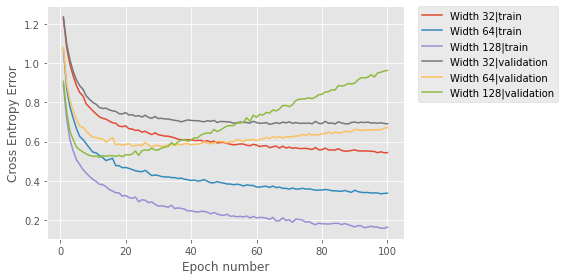

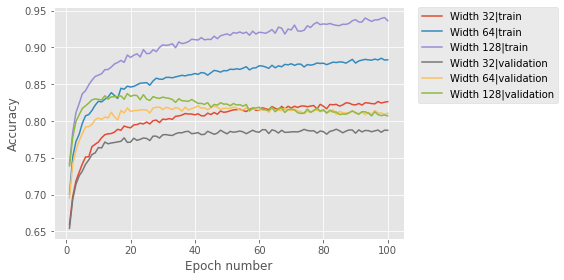

[0.7873417721518989, 0.8105063291139246, 0.8069620253164558]
[0.14726434914518816, 0.33468249692450736, 0.8003171905989782]


In [5]:
hidden_dim_list = [32,64,128]

learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

layers = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]

model = MultipleLayerModel(layers)

# err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

train_errors = []
validation_errors = []
train_accuracies = []
validation_accs = []

for hidden_dim in hidden_dim_list:
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]

    currModel = MultipleLayerModel(layers)
    
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        currModel, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    train_errors.append(err_train)
    validation_errors.append(err_valid)
    train_accuracies.append(acc_train)
    validation_accs.append(acc_valid)
    
fig_1 = plt.figure(figsize=(8,4))

ax_1 = fig_1.add_subplot(111)

ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Cross Entropy Error')

errors = train_errors + validation_errors
accs = train_accuracies + validation_accs

line_labels = ['Width 32|train', 'Width 64|train', 'Width 128|train', 'Width 32|validation', 'Width 64|validation', 'Width 128|validation']



for i, e in enumerate(errors):
    ax_1.plot(np.arange(1, len(e) + 1) * stats_interval, 
                  e, label=line_labels[i])

ax_1.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)    
    
fig_2 = plt.figure(figsize=(8,4))

ax_2 = fig_2.add_subplot(111)
ax_2.set_xlabel('Epoch number')
ax_2.set_ylabel('Accuracy')
for i, a in enumerate(accs):
    ax_2.plot(np.arange(1, len(a) + 1) * stats_interval, 
                  a, label=line_labels[i])

ax_2.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
fig_1.tight_layout()
fig_2.tight_layout()
plt.show()

fig_1.savefig('testfig1.pdf')
fig_2.savefig('testfig2.pdf')

val_accs = []
gen_gaps = []

for i in range(len(hidden_dim_list)):
    val_accs.append(validation_accs[i][-1])
    gen_gaps.append(validation_errors[i][-1] - train_errors[i][-1])

print(val_accs)
print(gen_gaps)


## Exploring the effect of varying the number of hidden layers

Shown below is the experimentation for varying the number of hidden layers (1,2,3) for a model with 128 hidden units per layer on the training and validation performance

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=8.94e-01, acc(train)=7.41e-01, error(valid)=9.13e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.0s to complete
    error(train)=6.93e-01, acc(train)=7.91e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=6.11e-01, acc(train)=8.08e-01, error(valid)=6.51e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=5.53e-01, acc(train)=8.25e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=5.10e-01, acc(train)=8.35e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.9s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.9s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.9s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.9s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.0s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.9s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.9s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.9s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.0s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.9s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.9s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.9s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.9s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.9s to complete
    error(train)=3.32e-01, acc(train)=8.83e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.3s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.6s to complete
    error(train)=3.15e-01, acc(train)=8.89e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.2s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.1s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.37e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.3s to complete
    error(train)=3.06e-01, acc(train)=8.93e-01, error(valid)=5.43e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.2s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.4s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=5.43e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.5s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=5.59e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.4s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=5.50e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.1s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=5.62e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=2.89e-01, acc(train)=8.95e-01, error(valid)=5.75e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.3s to complete
    error(train)=2.79e-01, acc(train)=8.99e-01, error(valid)=5.66e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.0s to complete
    error(train)=2.76e-01, acc(train)=9.00e-01, error(valid)=5.76e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.4s to complete
    error(train)=2.71e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.4s to complete
    error(train)=2.69e-01, acc(train)=9.03e-01, error(valid)=5.81e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=2.66e-01, acc(train)=9.03e-01, error(valid)=5.86e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.5s to complete
    error(train)=2.56e-01, acc(train)=9.08e-01, error(valid)=5.79e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.2s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=5.93e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=2.59e-01, acc(train)=9.05e-01, error(valid)=5.97e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=5.98e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.8s to complete
    error(train)=2.67e-01, acc(train)=9.01e-01, error(valid)=6.22e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.2s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=6.12e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=2.48e-01, acc(train)=9.08e-01, error(valid)=6.19e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=6.25e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.9s to complete
    error(train)=2.50e-01, acc(train)=9.07e-01, error(valid)=6.31e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.7s to complete
    error(train)=2.41e-01, acc(train)=9.11e-01, error(valid)=6.30e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.7s to complete
    error(train)=2.47e-01, acc(train)=9.08e-01, error(valid)=6.46e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.9s to complete
    error(train)=2.30e-01, acc(train)=9.16e-01, error(valid)=6.32e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.9s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.31e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.3s to complete
    error(train)=2.28e-01, acc(train)=9.16e-01, error(valid)=6.47e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.3s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.46e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=2.27e-01, acc(train)=9.16e-01, error(valid)=6.57e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.9s to complete
    error(train)=2.30e-01, acc(train)=9.14e-01, error(valid)=6.76e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.1s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=6.65e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.3s to complete
    error(train)=2.21e-01, acc(train)=9.18e-01, error(valid)=6.78e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.2s to complete
    error(train)=2.15e-01, acc(train)=9.22e-01, error(valid)=6.80e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.9s to complete
    error(train)=2.15e-01, acc(train)=9.20e-01, error(valid)=6.81e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.4s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=6.90e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.1s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=6.91e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=6.99e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.9s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.04e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.0s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.09e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.7s to complete
    error(train)=2.07e-01, acc(train)=9.22e-01, error(valid)=7.20e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.0s to complete
    error(train)=2.01e-01, acc(train)=9.24e-01, error(valid)=7.19e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.3s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.28e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.9s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=7.26e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.0s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.36e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.2s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.41e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.0s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.50e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.0s to complete
    error(train)=1.90e-01, acc(train)=9.30e-01, error(valid)=7.46e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.5s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=7.68e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=1.89e-01, acc(train)=9.30e-01, error(valid)=7.61e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.8s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=7.64e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.9s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=7.74e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.9s to complete
    error(train)=1.94e-01, acc(train)=9.26e-01, error(valid)=7.81e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.0s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=7.80e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.8s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=7.87e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.9s to complete
    error(train)=1.89e-01, acc(train)=9.28e-01, error(valid)=7.98e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.1s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=8.05e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.0s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.09e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.4s to complete
    error(train)=1.86e-01, acc(train)=9.28e-01, error(valid)=8.21e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.9s to complete
    error(train)=1.79e-01, acc(train)=9.32e-01, error(valid)=8.26e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.0s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=8.23e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.35e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.3s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.51e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.4s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=8.36e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.0s to complete
    error(train)=1.74e-01, acc(train)=9.33e-01, error(valid)=8.46e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.2s to complete
    error(train)=1.78e-01, acc(train)=9.31e-01, error(valid)=8.75e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.9s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=8.62e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.0s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=8.62e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.0s to complete
    error(train)=1.66e-01, acc(train)=9.36e-01, error(valid)=8.69e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.0s to complete
    error(train)=1.66e-01, acc(train)=9.38e-01, error(valid)=8.81e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.2s to complete
    error(train)=1.74e-01, acc(train)=9.33e-01, error(valid)=8.95e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.9s to complete
    error(train)=1.58e-01, acc(train)=9.40e-01, error(valid)=8.81e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.9s to complete
    error(train)=1.65e-01, acc(train)=9.36e-01, error(valid)=8.94e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.2s to complete
    error(train)=1.65e-01, acc(train)=9.36e-01, error(valid)=9.03e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.3s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.22e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.8s to complete
    error(train)=1.66e-01, acc(train)=9.37e-01, error(valid)=9.22e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.1s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=9.28e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.8s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=9.49e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.9s to complete
    error(train)=1.62e-01, acc(train)=9.37e-01, error(valid)=9.46e-01, acc(valid)=8.07e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.3s to complete
    error(train)=7.68e-01, acc(train)=7.64e-01, error(valid)=7.94e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=5.98e-01, acc(train)=8.07e-01, error(valid)=6.38e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.5s to complete
    error(train)=5.25e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.4s to complete
    error(train)=4.62e-01, acc(train)=8.45e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.0s to complete
    error(train)=4.28e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.5s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.5s to complete
    error(train)=3.89e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.6s to complete
    error(train)=3.60e-01, acc(train)=8.72e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.3s to complete
    error(train)=3.35e-01, acc(train)=8.81e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.4s to complete
    error(train)=3.29e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.5s to complete
    error(train)=3.24e-01, acc(train)=8.82e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=2.90e-01, acc(train)=8.92e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.6s to complete
    error(train)=2.89e-01, acc(train)=8.94e-01, error(valid)=5.18e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.6s to complete
    error(train)=2.75e-01, acc(train)=8.98e-01, error(valid)=5.13e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.4s to complete
    error(train)=2.63e-01, acc(train)=9.01e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.3s to complete
    error(train)=2.66e-01, acc(train)=8.98e-01, error(valid)=5.33e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.3s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.7s to complete
    error(train)=2.40e-01, acc(train)=9.10e-01, error(valid)=5.34e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.4s to complete
    error(train)=2.39e-01, acc(train)=9.08e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.5s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.55e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.3s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=5.79e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.4s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=5.87e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.1s to complete
    error(train)=2.09e-01, acc(train)=9.19e-01, error(valid)=5.89e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.5s to complete
    error(train)=2.09e-01, acc(train)=9.19e-01, error(valid)=6.10e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.7s to complete
    error(train)=2.04e-01, acc(train)=9.21e-01, error(valid)=6.11e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.8s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.30e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.1s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.41e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.9s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.47e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.9s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=6.72e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.7s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.86e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.0s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=6.89e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.2s to complete
    error(train)=1.75e-01, acc(train)=9.31e-01, error(valid)=6.96e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.8s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.13e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.2s to complete
    error(train)=1.81e-01, acc(train)=9.25e-01, error(valid)=7.34e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.2s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=7.40e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=7.42e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.7s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.69e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.8s to complete
    error(train)=1.69e-01, acc(train)=9.32e-01, error(valid)=7.83e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.7s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=7.86e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.5s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=8.17e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=8.00e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.3s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=8.26e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.1s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=8.24e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=8.42e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.8s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=8.71e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.4s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=8.78e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.9s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=8.84e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.1s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=9.04e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.5s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=9.39e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.8s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.8s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=9.37e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.2s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=9.59e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.6s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=9.86e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.5s to complete
    error(train)=1.31e-01, acc(train)=9.45e-01, error(valid)=1.01e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.0s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.01e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.6s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.05e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.04e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=1.04e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.4s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.07e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.7s to complete
    error(train)=1.29e-01, acc(train)=9.46e-01, error(valid)=1.10e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.6s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=1.11e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.4s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.11e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.1s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.10e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.4s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.14e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.7s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.17e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.7s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.14e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.7s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.16e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.6s to complete
    error(train)=1.26e-01, acc(train)=9.50e-01, error(valid)=1.18e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.4s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.19e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.4s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.21e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.25e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.5s to complete
    error(train)=9.94e-02, acc(train)=9.60e-01, error(valid)=1.20e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.7s to complete
    error(train)=1.27e-01, acc(train)=9.50e-01, error(valid)=1.28e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.0s to complete
    error(train)=1.32e-01, acc(train)=9.48e-01, error(valid)=1.28e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.0s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.9s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.28e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.9s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.33e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.8s to complete
    error(train)=9.92e-02, acc(train)=9.59e-01, error(valid)=1.32e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.7s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=1.35e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.9s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.39e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.6s to complete
    error(train)=9.65e-02, acc(train)=9.60e-01, error(valid)=1.37e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=1.01e-01, acc(train)=9.59e-01, error(valid)=1.35e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.6s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.42e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=1.40e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.7s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.44e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.1s to complete
    error(train)=9.15e-02, acc(train)=9.62e-01, error(valid)=1.42e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.8s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.49e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.8s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=1.44e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.9s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.47e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.7s to complete
    error(train)=8.70e-02, acc(train)=9.64e-01, error(valid)=1.45e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.8s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.49e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=9.84e-02, acc(train)=9.59e-01, error(valid)=1.49e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.3s to complete
    error(train)=9.63e-02, acc(train)=9.60e-01, error(valid)=1.50e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.9s to complete
    error(train)=9.28e-02, acc(train)=9.62e-01, error(valid)=1.51e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.9s to complete
    error(train)=9.15e-02, acc(train)=9.63e-01, error(valid)=1.52e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.9s to complete
    error(train)=9.94e-02, acc(train)=9.59e-01, error(valid)=1.53e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.7s to complete
    error(train)=9.40e-02, acc(train)=9.62e-01, error(valid)=1.57e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.9s to complete
    error(train)=9.94e-02, acc(train)=9.60e-01, error(valid)=1.58e+00, acc(valid)=8.15e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.5s to complete
    error(train)=6.78e-01, acc(train)=7.86e-01, error(valid)=7.07e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.8s to complete
    error(train)=5.65e-01, acc(train)=8.14e-01, error(valid)=6.11e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.5s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=5.49e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.0s to complete
    error(train)=4.46e-01, acc(train)=8.44e-01, error(valid)=5.25e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.8s to complete
    error(train)=4.08e-01, acc(train)=8.58e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.7s to complete
    error(train)=3.96e-01, acc(train)=8.58e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.7s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.3s to complete
    error(train)=3.49e-01, acc(train)=8.74e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.5s to complete
    error(train)=3.55e-01, acc(train)=8.71e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.8s to complete
    error(train)=3.20e-01, acc(train)=8.82e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.1s to complete
    error(train)=3.14e-01, acc(train)=8.84e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.6s to complete
    error(train)=3.05e-01, acc(train)=8.86e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.7s to complete
    error(train)=2.93e-01, acc(train)=8.89e-01, error(valid)=5.28e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.3s to complete
    error(train)=2.92e-01, acc(train)=8.89e-01, error(valid)=5.37e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.2s to complete
    error(train)=2.77e-01, acc(train)=8.96e-01, error(valid)=5.41e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.3s to complete
    error(train)=2.68e-01, acc(train)=8.97e-01, error(valid)=5.39e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.0s to complete
    error(train)=2.70e-01, acc(train)=8.97e-01, error(valid)=5.64e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.7s to complete
    error(train)=2.60e-01, acc(train)=8.99e-01, error(valid)=5.78e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.3s to complete
    error(train)=2.57e-01, acc(train)=8.98e-01, error(valid)=5.78e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.0s to complete
    error(train)=2.44e-01, acc(train)=9.04e-01, error(valid)=5.84e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.8s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=6.02e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.7s to complete
    error(train)=2.38e-01, acc(train)=9.06e-01, error(valid)=6.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.7s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=6.26e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.3s to complete
    error(train)=2.28e-01, acc(train)=9.10e-01, error(valid)=6.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.7s to complete
    error(train)=2.42e-01, acc(train)=9.02e-01, error(valid)=6.51e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.1s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=6.66e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.7s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=6.53e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.1s to complete
    error(train)=2.16e-01, acc(train)=9.13e-01, error(valid)=6.68e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.2s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.77e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.2s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=6.82e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.9s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=6.91e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.3s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=7.33e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.4s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.35e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.6s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.64e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.6s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=7.48e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.6s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=7.97e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.0s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.94e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.5s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=8.11e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.4s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=8.13e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.9s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=8.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.9s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=8.76e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.8s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=8.38e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.1s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=8.54e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.2s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=8.73e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.3s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=8.56e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.5s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=9.09e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.3s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=8.96e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.1s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=9.14e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.2s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=9.43e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.4s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=9.48e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.1s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=9.43e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.7s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=9.81e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.3s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=9.75e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.4s to complete
    error(train)=1.69e-01, acc(train)=9.29e-01, error(valid)=9.65e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.7s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=1.02e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.5s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.4s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.2s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=1.08e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.1s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=1.07e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.4s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=1.08e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.4s to complete
    error(train)=1.61e-01, acc(train)=9.33e-01, error(valid)=1.07e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.2s to complete
    error(train)=1.66e-01, acc(train)=9.30e-01, error(valid)=1.06e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.2s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=1.10e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.3s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.06e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.3s to complete
    error(train)=1.61e-01, acc(train)=9.36e-01, error(valid)=1.11e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.4s to complete
    error(train)=1.78e-01, acc(train)=9.31e-01, error(valid)=1.14e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.2s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=1.14e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.7s to complete
    error(train)=1.50e-01, acc(train)=9.40e-01, error(valid)=1.16e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.5s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=1.17e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.9s to complete
    error(train)=1.74e-01, acc(train)=9.32e-01, error(valid)=1.24e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.8s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=1.20e+00, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.3s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=1.22e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.3s to complete
    error(train)=1.44e-01, acc(train)=9.43e-01, error(valid)=1.21e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.3s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=1.25e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.9s to complete
    error(train)=1.57e-01, acc(train)=9.38e-01, error(valid)=1.28e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.2s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=1.21e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.1s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=1.25e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.2s to complete
    error(train)=1.47e-01, acc(train)=9.41e-01, error(valid)=1.28e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.6s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=1.34e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.1s to complete
    error(train)=1.54e-01, acc(train)=9.38e-01, error(valid)=1.28e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.1s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.33e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.1s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=1.29e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.2s to complete
    error(train)=1.51e-01, acc(train)=9.40e-01, error(valid)=1.32e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.3s to complete
    error(train)=1.60e-01, acc(train)=9.38e-01, error(valid)=1.29e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.3s to complete
    error(train)=1.38e-01, acc(train)=9.46e-01, error(valid)=1.35e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.3s to complete
    error(train)=1.56e-01, acc(train)=9.39e-01, error(valid)=1.38e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.6s to complete
    error(train)=1.51e-01, acc(train)=9.40e-01, error(valid)=1.37e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.2s to complete
    error(train)=1.44e-01, acc(train)=9.43e-01, error(valid)=1.32e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.2s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=1.34e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.38e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.2s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.40e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.6s to complete
    error(train)=1.56e-01, acc(train)=9.40e-01, error(valid)=1.43e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.2s to complete
    error(train)=1.45e-01, acc(train)=9.43e-01, error(valid)=1.40e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.1s to complete
    error(train)=1.48e-01, acc(train)=9.42e-01, error(valid)=1.48e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.4s to complete
    error(train)=1.48e-01, acc(train)=9.42e-01, error(valid)=1.43e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.2s to complete
    error(train)=1.44e-01, acc(train)=9.43e-01, error(valid)=1.49e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.2s to complete
    error(train)=1.37e-01, acc(train)=9.47e-01, error(valid)=1.48e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.5s to complete
    error(train)=1.42e-01, acc(train)=9.44e-01, error(valid)=1.52e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.3s to complete
    error(train)=1.54e-01, acc(train)=9.40e-01, error(valid)=1.56e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.4s to complete
    error(train)=1.69e-01, acc(train)=9.38e-01, error(valid)=1.54e+00, acc(valid)=8.10e-01


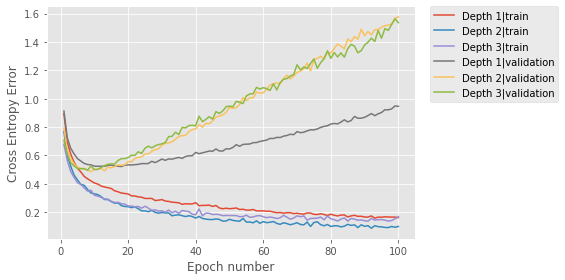

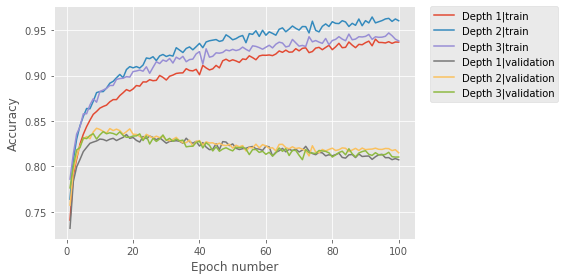

[0.8073417721518985, 0.8150632911392401, 0.8103797468354433]
[0.7842366394174315, 1.476870460134027, 1.3669793513898387]


In [7]:
models = []

learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

train_errors = []
validation_errors = []
train_accuracies = []
validation_accs = []

# constructing the 3 models
for i in range(3):
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()    
    ]
    layers += [AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer() ]*i
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init))
    
    model = MultipleLayerModel(layers)
    models.append(MultipleLayerModel(layers))
                  
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    train_errors.append(err_train)
    validation_errors.append(err_valid)
    train_accuracies.append(acc_train)
    validation_accs.append(acc_valid)
    
fig_1 = plt.figure(figsize=(8,4))

ax_1 = fig_1.add_subplot(111)

ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Cross Entropy Error')

errors = train_errors + validation_errors
accs = train_accuracies + validation_accs

line_labels = ['Depth 1|train', 'Depth 2|train', 'Depth 3|train', 'Depth 1|validation', 'Depth 2|validation', 'Depth 3|validation']

for i, e in enumerate(errors):
    ax_1.plot(np.arange(1, len(e) + 1) * stats_interval, 
                  e, label=line_labels[i])

ax_1.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)    
    
fig_2 = plt.figure(figsize=(8,4))

ax_2 = fig_2.add_subplot(111)
ax_2.set_xlabel('Epoch number')
ax_2.set_ylabel('Accuracy')
for i, a in enumerate(accs):
    ax_2.plot(np.arange(1, len(a) + 1) * stats_interval, 
                  a, label=line_labels[i])

ax_2.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
fig_1.tight_layout()
fig_2.tight_layout()
plt.show()

fig_1.savefig('depthfig1.pdf')
fig_2.savefig('depthfig2.pdf')

val_accs = []
gen_gaps = []

for i in range(3):
    val_accs.append(validation_accs[i][-1])
    gen_gaps.append(validation_errors[i][-1] - train_errors[i][-1])

print(val_accs)
print(gen_gaps)

## EMNIST Dropout & Regularisation Experiments
The below cells show the results of experimenting with multiple differen combinations of hyperparameters (including the use of dropout, L1 and L2 regularisations) on the generalisation capatbilities of a base NN architecture: 3 hidden layers, 128 hidden units/layer 

#### Individual dropouts:

Experimenting with modifying the OG architecture with dropout values of 0.7, 0.9, 0.95

Producing graphs of validation accuracy and generalisation gap against epoch number

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.4s to complete
    error(train)=2.33e+00, acc(train)=4.27e-01, error(valid)=2.34e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.4s to complete
    error(train)=1.78e+00, acc(train)=5.44e-01, error(valid)=1.78e+00, acc(valid)=5.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.8s to complete
    error(train)=1.53e+00, acc(train)=5.94e-01, error(valid)=1.53e+00, acc(valid)=5.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.6s to complete
    error(train)=1.37e+00, acc(train)=6.26e-01, error(valid)=1.37e+00, acc(valid)=6.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.4s to complete
    error(train)=1.26e+00, acc(train)=6.48e-01, error(valid)=1.27e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.4s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.8s to complete
    error(train)=1.11e+00, acc(train)=6.81e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.6s to complete
    error(train)=1.05e+00, acc(train)=6.95e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.2s to complete
    error(train)=1.01e+00, acc(train)=7.04e-01, error(valid)=1.02e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.7s to complete
    error(train)=9.63e-01, acc(train)=7.15e-01, error(valid)=9.68e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.4s to complete
    error(train)=9.28e-01, acc(train)=7.23e-01, error(valid)=9.34e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.4s to complete
    error(train)=8.99e-01, acc(train)=7.31e-01, error(valid)=9.06e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.4s to complete
    error(train)=8.71e-01, acc(train)=7.38e-01, error(valid)=8.77e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.5s to complete
    error(train)=8.47e-01, acc(train)=7.43e-01, error(valid)=8.55e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.6s to complete
    error(train)=8.26e-01, acc(train)=7.48e-01, error(valid)=8.36e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.4s to complete
    error(train)=8.03e-01, acc(train)=7.54e-01, error(valid)=8.12e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.0s to complete
    error(train)=7.84e-01, acc(train)=7.58e-01, error(valid)=7.95e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.5s to complete
    error(train)=7.75e-01, acc(train)=7.61e-01, error(valid)=7.85e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.5s to complete
    error(train)=7.54e-01, acc(train)=7.66e-01, error(valid)=7.66e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.5s to complete
    error(train)=7.37e-01, acc(train)=7.71e-01, error(valid)=7.51e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.5s to complete
    error(train)=7.26e-01, acc(train)=7.73e-01, error(valid)=7.40e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.4s to complete
    error(train)=7.12e-01, acc(train)=7.76e-01, error(valid)=7.27e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.5s to complete
    error(train)=7.01e-01, acc(train)=7.81e-01, error(valid)=7.17e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.5s to complete
    error(train)=6.92e-01, acc(train)=7.83e-01, error(valid)=7.10e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.5s to complete
    error(train)=6.83e-01, acc(train)=7.85e-01, error(valid)=7.01e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.1s to complete
    error(train)=6.73e-01, acc(train)=7.87e-01, error(valid)=6.93e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.4s to complete
    error(train)=6.65e-01, acc(train)=7.90e-01, error(valid)=6.84e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.4s to complete
    error(train)=6.55e-01, acc(train)=7.92e-01, error(valid)=6.75e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.5s to complete
    error(train)=6.47e-01, acc(train)=7.94e-01, error(valid)=6.68e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.4s to complete
    error(train)=6.37e-01, acc(train)=7.96e-01, error(valid)=6.61e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.5s to complete
    error(train)=6.33e-01, acc(train)=7.96e-01, error(valid)=6.57e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.5s to complete
    error(train)=6.28e-01, acc(train)=7.99e-01, error(valid)=6.51e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.5s to complete
    error(train)=6.21e-01, acc(train)=8.01e-01, error(valid)=6.46e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.5s to complete
    error(train)=6.18e-01, acc(train)=8.01e-01, error(valid)=6.44e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.4s to complete
    error(train)=6.07e-01, acc(train)=8.04e-01, error(valid)=6.33e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.6s to complete
    error(train)=6.03e-01, acc(train)=8.05e-01, error(valid)=6.30e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.5s to complete
    error(train)=5.95e-01, acc(train)=8.08e-01, error(valid)=6.23e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.7s to complete
    error(train)=5.92e-01, acc(train)=8.08e-01, error(valid)=6.21e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.4s to complete
    error(train)=5.89e-01, acc(train)=8.08e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.4s to complete
    error(train)=5.83e-01, acc(train)=8.10e-01, error(valid)=6.13e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=5.79e-01, acc(train)=8.11e-01, error(valid)=6.10e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.1s to complete
    error(train)=5.75e-01, acc(train)=8.13e-01, error(valid)=6.07e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.4s to complete
    error(train)=5.69e-01, acc(train)=8.13e-01, error(valid)=6.01e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.4s to complete
    error(train)=5.66e-01, acc(train)=8.14e-01, error(valid)=5.98e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.6s to complete
    error(train)=5.63e-01, acc(train)=8.16e-01, error(valid)=5.97e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.7s to complete
    error(train)=5.57e-01, acc(train)=8.17e-01, error(valid)=5.90e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.4s to complete
    error(train)=5.54e-01, acc(train)=8.18e-01, error(valid)=5.87e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.9s to complete
    error(train)=5.52e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.7s to complete
    error(train)=5.48e-01, acc(train)=8.19e-01, error(valid)=5.84e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.6s to complete
    error(train)=5.44e-01, acc(train)=8.20e-01, error(valid)=5.79e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.7s to complete
    error(train)=5.41e-01, acc(train)=8.21e-01, error(valid)=5.78e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.7s to complete
    error(train)=5.40e-01, acc(train)=8.21e-01, error(valid)=5.79e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.7s to complete
    error(train)=5.35e-01, acc(train)=8.23e-01, error(valid)=5.73e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.6s to complete
    error(train)=5.31e-01, acc(train)=8.24e-01, error(valid)=5.71e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.5s to complete
    error(train)=5.29e-01, acc(train)=8.24e-01, error(valid)=5.68e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.6s to complete
    error(train)=5.26e-01, acc(train)=8.25e-01, error(valid)=5.66e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.8s to complete
    error(train)=5.23e-01, acc(train)=8.26e-01, error(valid)=5.65e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.6s to complete
    error(train)=5.21e-01, acc(train)=8.27e-01, error(valid)=5.62e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.3s to complete
    error(train)=5.17e-01, acc(train)=8.27e-01, error(valid)=5.58e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.5s to complete
    error(train)=5.15e-01, acc(train)=8.28e-01, error(valid)=5.58e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.6s to complete
    error(train)=5.13e-01, acc(train)=8.28e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.6s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.54e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.5s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=5.50e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.5s to complete
    error(train)=5.04e-01, acc(train)=8.31e-01, error(valid)=5.47e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.5s to complete
    error(train)=5.03e-01, acc(train)=8.31e-01, error(valid)=5.47e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.5s to complete
    error(train)=5.00e-01, acc(train)=8.32e-01, error(valid)=5.45e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.5s to complete
    error(train)=4.98e-01, acc(train)=8.33e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.7s to complete
    error(train)=4.97e-01, acc(train)=8.33e-01, error(valid)=5.42e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.8s to complete
    error(train)=4.95e-01, acc(train)=8.33e-01, error(valid)=5.40e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.7s to complete
    error(train)=4.93e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.2s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.8s to complete
    error(train)=4.87e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.6s to complete
    error(train)=4.87e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.4s to complete
    error(train)=4.84e-01, acc(train)=8.36e-01, error(valid)=5.32e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.7s to complete
    error(train)=4.84e-01, acc(train)=8.35e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.6s to complete
    error(train)=4.83e-01, acc(train)=8.36e-01, error(valid)=5.33e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.7s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.6s to complete
    error(train)=4.78e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.8s to complete
    error(train)=4.76e-01, acc(train)=8.38e-01, error(valid)=5.26e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.7s to complete
    error(train)=4.76e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.6s to complete
    error(train)=4.74e-01, acc(train)=8.39e-01, error(valid)=5.26e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.4s to complete
    error(train)=4.71e-01, acc(train)=8.40e-01, error(valid)=5.22e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.5s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.20e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.0s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.7s to complete
    error(train)=4.65e-01, acc(train)=8.41e-01, error(valid)=5.17e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=5.19e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.6s to complete
    error(train)=4.63e-01, acc(train)=8.42e-01, error(valid)=5.18e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=4.63e-01, acc(train)=8.41e-01, error(valid)=5.17e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.1s to complete
    error(train)=4.59e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.5s to complete
    error(train)=4.58e-01, acc(train)=8.44e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.4s to complete
    error(train)=4.55e-01, acc(train)=8.44e-01, error(valid)=5.11e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.7s to complete
    error(train)=4.57e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.6s to complete
    error(train)=4.55e-01, acc(train)=8.44e-01, error(valid)=5.12e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.5s to complete
    error(train)=4.53e-01, acc(train)=8.45e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.5s to complete
    error(train)=4.54e-01, acc(train)=8.44e-01, error(valid)=5.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.6s to complete
    error(train)=4.51e-01, acc(train)=8.44e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.6s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.7s to complete
    error(train)=4.48e-01, acc(train)=8.46e-01, error(valid)=5.07e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.4s to complete
    error(train)=4.45e-01, acc(train)=8.46e-01, error(valid)=5.05e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=4.46e-01, acc(train)=8.46e-01, error(valid)=5.05e-01, acc(valid)=8.30e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.2s to complete
    error(train)=1.64e+00, acc(train)=5.68e-01, error(valid)=1.64e+00, acc(valid)=5.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.4s to complete
    error(train)=1.28e+00, acc(train)=6.44e-01, error(valid)=1.29e+00, acc(valid)=6.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.3s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.2s to complete
    error(train)=1.00e+00, acc(train)=7.05e-01, error(valid)=1.01e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.3s to complete
    error(train)=9.19e-01, acc(train)=7.29e-01, error(valid)=9.33e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.8s to complete
    error(train)=8.53e-01, acc(train)=7.47e-01, error(valid)=8.69e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.3s to complete
    error(train)=8.03e-01, acc(train)=7.57e-01, error(valid)=8.19e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.3s to complete
    error(train)=7.61e-01, acc(train)=7.68e-01, error(valid)=7.79e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.4s to complete
    error(train)=7.23e-01, acc(train)=7.78e-01, error(valid)=7.43e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.6s to complete
    error(train)=7.00e-01, acc(train)=7.84e-01, error(valid)=7.21e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.4s to complete
    error(train)=6.71e-01, acc(train)=7.91e-01, error(valid)=6.95e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.5s to complete
    error(train)=6.47e-01, acc(train)=7.97e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.5s to complete
    error(train)=6.23e-01, acc(train)=8.04e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.5s to complete
    error(train)=6.08e-01, acc(train)=8.07e-01, error(valid)=6.38e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.7s to complete
    error(train)=5.92e-01, acc(train)=8.11e-01, error(valid)=6.23e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.5s to complete
    error(train)=5.79e-01, acc(train)=8.14e-01, error(valid)=6.12e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.5s to complete
    error(train)=5.63e-01, acc(train)=8.19e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.7s to complete
    error(train)=5.52e-01, acc(train)=8.21e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.4s to complete
    error(train)=5.43e-01, acc(train)=8.24e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.5s to complete
    error(train)=5.30e-01, acc(train)=8.27e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.6s to complete
    error(train)=5.19e-01, acc(train)=8.29e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.5s to complete
    error(train)=5.11e-01, acc(train)=8.32e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.5s to complete
    error(train)=5.03e-01, acc(train)=8.34e-01, error(valid)=5.48e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.5s to complete
    error(train)=4.98e-01, acc(train)=8.36e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.5s to complete
    error(train)=4.89e-01, acc(train)=8.38e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.5s to complete
    error(train)=4.82e-01, acc(train)=8.40e-01, error(valid)=5.32e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.4s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.4s to complete
    error(train)=4.67e-01, acc(train)=8.44e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.7s to complete
    error(train)=4.61e-01, acc(train)=8.46e-01, error(valid)=5.15e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.6s to complete
    error(train)=4.58e-01, acc(train)=8.46e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.6s to complete
    error(train)=4.50e-01, acc(train)=8.49e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.8s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.6s to complete
    error(train)=4.42e-01, acc(train)=8.50e-01, error(valid)=5.01e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.3s to complete
    error(train)=4.35e-01, acc(train)=8.53e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.5s to complete
    error(train)=4.31e-01, acc(train)=8.54e-01, error(valid)=4.93e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.5s to complete
    error(train)=4.27e-01, acc(train)=8.54e-01, error(valid)=4.92e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.5s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=4.91e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.0s to complete
    error(train)=4.21e-01, acc(train)=8.56e-01, error(valid)=4.89e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.5s to complete
    error(train)=4.14e-01, acc(train)=8.58e-01, error(valid)=4.83e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.5s to complete
    error(train)=4.10e-01, acc(train)=8.60e-01, error(valid)=4.81e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.5s to complete
    error(train)=4.07e-01, acc(train)=8.60e-01, error(valid)=4.78e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.9s to complete
    error(train)=4.05e-01, acc(train)=8.60e-01, error(valid)=4.77e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.2s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=4.72e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.8s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=4.71e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.0s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=4.72e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.6s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=4.70e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.5s to complete
    error(train)=3.89e-01, acc(train)=8.65e-01, error(valid)=4.67e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.5s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.5s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.5s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.5s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=4.61e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.6s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.5s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.1s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.6s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.52e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.5s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.5s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.6s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.49e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.6s to complete
    error(train)=3.58e-01, acc(train)=8.75e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.5s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.4s to complete
    error(train)=3.52e-01, acc(train)=8.76e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.4s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.7s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.6s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.6s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=4.45e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.4s to complete
    error(train)=3.42e-01, acc(train)=8.80e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.6s to complete
    error(train)=3.42e-01, acc(train)=8.79e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.6s to complete
    error(train)=3.41e-01, acc(train)=8.80e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.5s to complete
    error(train)=3.38e-01, acc(train)=8.81e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.2s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.7s to complete
    error(train)=3.33e-01, acc(train)=8.83e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.5s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.7s to complete
    error(train)=3.29e-01, acc(train)=8.84e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.6s to complete
    error(train)=3.27e-01, acc(train)=8.84e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.5s to complete
    error(train)=3.24e-01, acc(train)=8.85e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.6s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.6s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.4s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.6s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.31e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.5s to complete
    error(train)=3.18e-01, acc(train)=8.87e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.7s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.8s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.5s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=4.28e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.0s to complete
    error(train)=3.11e-01, acc(train)=8.89e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.7s to complete
    error(train)=3.10e-01, acc(train)=8.89e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.5s to complete
    error(train)=3.05e-01, acc(train)=8.90e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.7s to complete
    error(train)=3.05e-01, acc(train)=8.91e-01, error(valid)=4.26e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.6s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.5s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.8s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.7s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.7s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.5s to complete
    error(train)=2.98e-01, acc(train)=8.92e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.6s to complete
    error(train)=2.97e-01, acc(train)=8.93e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.6s to complete
    error(train)=2.97e-01, acc(train)=8.93e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.6s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=4.24e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.4s to complete
    error(train)=2.92e-01, acc(train)=8.94e-01, error(valid)=4.22e-01, acc(valid)=8.55e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.4s to complete
    error(train)=1.49e+00, acc(train)=5.89e-01, error(valid)=1.50e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.3s to complete
    error(train)=1.21e+00, acc(train)=6.57e-01, error(valid)=1.23e+00, acc(valid)=6.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=1.06e+00, acc(train)=6.93e-01, error(valid)=1.08e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.7s to complete
    error(train)=9.64e-01, acc(train)=7.19e-01, error(valid)=9.81e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=8.88e-01, acc(train)=7.40e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.5s to complete
    error(train)=8.17e-01, acc(train)=7.56e-01, error(valid)=8.37e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.4s to complete
    error(train)=7.67e-01, acc(train)=7.67e-01, error(valid)=7.89e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.4s to complete
    error(train)=7.19e-01, acc(train)=7.80e-01, error(valid)=7.43e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.4s to complete
    error(train)=6.85e-01, acc(train)=7.89e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.4s to complete
    error(train)=6.57e-01, acc(train)=7.95e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.9s to complete
    error(train)=6.30e-01, acc(train)=8.02e-01, error(valid)=6.61e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.4s to complete
    error(train)=6.08e-01, acc(train)=8.08e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.5s to complete
    error(train)=5.89e-01, acc(train)=8.13e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=5.76e-01, acc(train)=8.17e-01, error(valid)=6.15e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.3s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.6s to complete
    error(train)=5.40e-01, acc(train)=8.28e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.2s to complete
    error(train)=5.31e-01, acc(train)=8.29e-01, error(valid)=5.74e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.5s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.65e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.3s to complete
    error(train)=5.05e-01, acc(train)=8.35e-01, error(valid)=5.53e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.0s to complete
    error(train)=4.95e-01, acc(train)=8.38e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.5s to complete
    error(train)=4.87e-01, acc(train)=8.40e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.5s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.4s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.4s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.9s to complete
    error(train)=4.53e-01, acc(train)=8.49e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.8s to complete
    error(train)=4.50e-01, acc(train)=8.50e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.5s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.4s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.5s to complete
    error(train)=4.29e-01, acc(train)=8.56e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.4s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.5s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.5s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.5s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.3s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.4s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.9s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.6s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=4.78e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.4s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=4.73e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.5s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.71e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.4s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.6s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.9s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.6s to complete
    error(train)=3.64e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.5s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.6s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.9s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.6s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.7s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.5s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=4.57e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.5s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.5s to complete
    error(train)=3.42e-01, acc(train)=8.80e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.7s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.6s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.8s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=4.49e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.6s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.6s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=4.45e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.3s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.5s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.5s to complete
    error(train)=3.21e-01, acc(train)=8.88e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.5s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.4s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.6s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=4.42e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.5s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.4s to complete
    error(train)=3.12e-01, acc(train)=8.90e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.6s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=4.40e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.0s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.7s to complete
    error(train)=3.06e-01, acc(train)=8.91e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.6s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=4.38e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.0s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.5s to complete
    error(train)=3.03e-01, acc(train)=8.92e-01, error(valid)=4.41e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.6s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.38e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.4s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=4.36e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.5s to complete
    error(train)=2.94e-01, acc(train)=8.94e-01, error(valid)=4.35e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.4s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=4.36e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.4s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=4.36e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.9s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=4.38e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.7s to complete
    error(train)=2.89e-01, acc(train)=8.97e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.6s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.36e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.6s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.38e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.3s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.38e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.4s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=4.35e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.0s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=4.33e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.3s to complete
    error(train)=2.81e-01, acc(train)=8.99e-01, error(valid)=4.37e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.4s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.35e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.4s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.33e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.5s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=4.33e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=4.35e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.4s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=4.36e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=4.37e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.4s to complete
    error(train)=2.71e-01, acc(train)=9.02e-01, error(valid)=4.38e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.5s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.34e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.4s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=4.34e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.5s to complete
    error(train)=2.66e-01, acc(train)=9.04e-01, error(valid)=4.34e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.5s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=4.34e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.3s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.38e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.4s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=4.35e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.4s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=4.33e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.9s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=4.37e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.6s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=4.33e-01, acc(valid)=8.60e-01


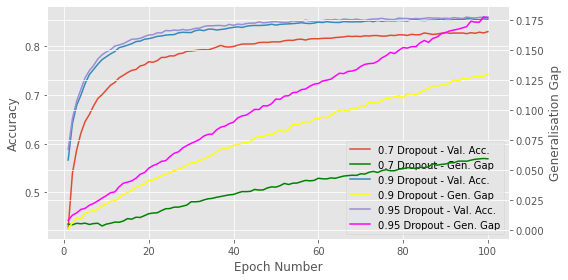

[0.8303164556962019, 0.8554430379746831, 0.860379746835443]
[0.059415544141728394, 0.13023650501051254, 0.17706791709377218]


In [12]:
from mlp.layers import DropoutLayer

# l2pen = L2Penalty(0.001)
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

generalisation_gaps = []
validation_accs = []

dropout_values = [0.7, 0.9, 0.95]

for dropout in dropout_values:
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropout, rng=rng),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropout, rng=rng),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropout, rng=rng),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    
    model = MultipleLayerModel(layers)
    
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    validation_accs.append(acc_valid)
    generalisation_gaps.append(err_valid - err_train)

    
##  Setting up the pyplot figure    

fig_1 = plt.figure(figsize=(8,4))

ax_1 = fig_1.add_subplot(111)

ax_1.set_xlabel('Epoch Number')
ax_1.set_ylabel('Accuracy')

twin = ax_1.twinx()
twin.set_ylabel('Generalisation Gap')

legend_handles = []
epochNums = np.arange(1, num_epochs + 1) * stats_interval

genGapColours = ['green','yellow','magenta']

for i in range(len(dropout_values)):
    valAccLineLabel = str(dropout_values[i]) + " Dropout - Val. Acc."
    genGapLineLabel = str(dropout_values[i]) + " Dropout - Gen. Gap"
    
    p1, = ax_1.plot(epochNums, validation_accs[i], label=valAccLineLabel)
    p2, = twin.plot(epochNums, generalisation_gaps[i], label=genGapLineLabel, color=genGapColours[i])

    legend_handles.append(p1)
    legend_handles.append(p2)

ax_1.legend(handles=legend_handles)
fig_1.tight_layout()
plt.show()

fig_1.savefig('dropoutfig.pdf')

val_accs = []
gen_gaps = []

for i in range(3):
    val_accs.append(validation_accs[i][-1])
    gen_gaps.append(generalisation_gaps[i][-1])

print(val_accs)
print(gen_gaps)

## Testing L1 & L2 Regularisation Independently

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.2s to complete
    error(train)=1.35e+00, acc(train)=6.23e-01, error(valid)=1.35e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.5s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.2s to complete
    error(train)=9.96e-01, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.2s to complete
    error(train)=9.15e-01, acc(train)=7.33e-01, error(valid)=9.27e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.5s to complete
    error(train)=8.53e-01, acc(train)=7.49e-01, error(valid)=8.68e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.2s to complete
    error(train)=8.07e-01, acc(train)=7.62e-01, error(valid)=8.23e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.0s to complete
    error(train)=7.65e-01, acc(train)=7.73e-01, error(valid)=7.85e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.8s to complete
    error(train)=7.39e-01, acc(train)=7.79e-01, error(valid)=7.60e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.5s to complete
    error(train)=7.07e-01, acc(train)=7.89e-01, error(valid)=7.30e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.7s to complete
    error(train)=6.83e-01, acc(train)=7.95e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.5s to complete
    error(train)=6.75e-01, acc(train)=7.93e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.0s to complete
    error(train)=6.48e-01, acc(train)=8.03e-01, error(valid)=6.79e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.8s to complete
    error(train)=6.36e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.9s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.51e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.8s to complete
    error(train)=6.08e-01, acc(train)=8.12e-01, error(valid)=6.41e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.7s to complete
    error(train)=5.94e-01, acc(train)=8.17e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.8s to complete
    error(train)=5.83e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.4s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=6.12e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.0s to complete
    error(train)=5.66e-01, acc(train)=8.25e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.7s to complete
    error(train)=5.54e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.8s to complete
    error(train)=5.48e-01, acc(train)=8.29e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.2s to complete
    error(train)=5.43e-01, acc(train)=8.30e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.0s to complete
    error(train)=5.34e-01, acc(train)=8.33e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.9s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.8s to complete
    error(train)=5.23e-01, acc(train)=8.35e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.6s to complete
    error(train)=5.17e-01, acc(train)=8.37e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.4s to complete
    error(train)=5.11e-01, acc(train)=8.38e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.6s to complete
    error(train)=5.05e-01, acc(train)=8.40e-01, error(valid)=5.48e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.4s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.1s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.6s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.0s to complete
    error(train)=4.89e-01, acc(train)=8.45e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.4s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.9s to complete
    error(train)=4.83e-01, acc(train)=8.46e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.8s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.6s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.6s to complete
    error(train)=4.73e-01, acc(train)=8.48e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.7s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.8s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.7s to complete
    error(train)=4.59e-01, acc(train)=8.52e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.5s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.1s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.1s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.9s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.4s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.4s to complete
    error(train)=4.44e-01, acc(train)=8.57e-01, error(valid)=4.97e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.0s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.6s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.8s to complete
    error(train)=4.38e-01, acc(train)=8.58e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.2s to complete
    error(train)=4.35e-01, acc(train)=8.59e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.1s to complete
    error(train)=4.36e-01, acc(train)=8.59e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.3s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.2s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.6s to complete
    error(train)=4.29e-01, acc(train)=8.60e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.4s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.6s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.4s to complete
    error(train)=4.29e-01, acc(train)=8.60e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.4s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.3s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.4s to complete
    error(train)=4.20e-01, acc(train)=8.64e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.6s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.6s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.4s to complete
    error(train)=4.15e-01, acc(train)=8.65e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.4s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.5s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.4s to complete
    error(train)=4.19e-01, acc(train)=8.60e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.4s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.5s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=4.75e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.4s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.3s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.4s to complete
    error(train)=4.05e-01, acc(train)=8.68e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.4s to complete
    error(train)=4.00e-01, acc(train)=8.70e-01, error(valid)=4.66e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.3s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=4.72e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.7s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.4s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=4.67e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.8s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.3s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.4s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.6s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.3s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.65e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.4s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.4s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.4s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.63e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.4s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.5s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.4s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.4s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.5s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.3s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.5s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.4s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.3s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=4.60e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.4s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.5s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.5s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.4s to complete
    error(train)=3.78e-01, acc(train)=8.75e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.5s to complete
    error(train)=3.85e-01, acc(train)=8.74e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.8s to complete
    error(train)=1.69e+00, acc(train)=5.55e-01, error(valid)=1.70e+00, acc(valid)=5.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.5s to complete
    error(train)=1.55e+00, acc(train)=5.90e-01, error(valid)=1.55e+00, acc(valid)=5.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.4s to complete
    error(train)=1.48e+00, acc(train)=6.06e-01, error(valid)=1.48e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.3s to complete
    error(train)=1.42e+00, acc(train)=6.18e-01, error(valid)=1.43e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.5s to complete
    error(train)=1.39e+00, acc(train)=6.23e-01, error(valid)=1.40e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.5s to complete
    error(train)=1.35e+00, acc(train)=6.34e-01, error(valid)=1.36e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.8s to complete
    error(train)=1.32e+00, acc(train)=6.40e-01, error(valid)=1.33e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.6s to complete
    error(train)=1.30e+00, acc(train)=6.44e-01, error(valid)=1.31e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.7s to complete
    error(train)=1.28e+00, acc(train)=6.48e-01, error(valid)=1.29e+00, acc(valid)=6.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.2s to complete
    error(train)=1.26e+00, acc(train)=6.54e-01, error(valid)=1.26e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.4s to complete
    error(train)=1.24e+00, acc(train)=6.54e-01, error(valid)=1.25e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.7s to complete
    error(train)=1.22e+00, acc(train)=6.62e-01, error(valid)=1.23e+00, acc(valid)=6.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.3s to complete
    error(train)=1.20e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.5s to complete
    error(train)=1.19e+00, acc(train)=6.68e-01, error(valid)=1.20e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.6s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.5s to complete
    error(train)=1.16e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.5s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.6s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.4s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.6s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.4s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.5s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.4s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.3s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.4s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.5s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.2s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.6s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.5s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.5s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.04e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.4s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.4s to complete
    error(train)=1.03e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.5s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.4s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.4s to complete
    error(train)=1.00e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.4s to complete
    error(train)=9.99e-01, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.5s to complete
    error(train)=9.98e-01, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.3s to complete
    error(train)=9.94e-01, acc(train)=7.12e-01, error(valid)=1.00e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.5s to complete
    error(train)=9.86e-01, acc(train)=7.16e-01, error(valid)=9.96e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.4s to complete
    error(train)=9.81e-01, acc(train)=7.16e-01, error(valid)=9.91e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.4s to complete
    error(train)=9.79e-01, acc(train)=7.17e-01, error(valid)=9.90e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.3s to complete
    error(train)=9.76e-01, acc(train)=7.17e-01, error(valid)=9.87e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.5s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=9.80e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.4s to complete
    error(train)=9.66e-01, acc(train)=7.20e-01, error(valid)=9.74e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.7s to complete
    error(train)=9.61e-01, acc(train)=7.22e-01, error(valid)=9.72e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.5s to complete
    error(train)=9.58e-01, acc(train)=7.23e-01, error(valid)=9.67e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.5s to complete
    error(train)=9.53e-01, acc(train)=7.24e-01, error(valid)=9.63e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.4s to complete
    error(train)=9.52e-01, acc(train)=7.24e-01, error(valid)=9.62e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.3s to complete
    error(train)=9.49e-01, acc(train)=7.23e-01, error(valid)=9.60e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.6s to complete
    error(train)=9.45e-01, acc(train)=7.26e-01, error(valid)=9.54e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.7s to complete
    error(train)=9.42e-01, acc(train)=7.27e-01, error(valid)=9.51e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.6s to complete
    error(train)=9.39e-01, acc(train)=7.27e-01, error(valid)=9.49e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.5s to complete
    error(train)=9.36e-01, acc(train)=7.27e-01, error(valid)=9.45e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.1s to complete
    error(train)=9.35e-01, acc(train)=7.28e-01, error(valid)=9.45e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.6s to complete
    error(train)=9.34e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.9s to complete
    error(train)=9.28e-01, acc(train)=7.30e-01, error(valid)=9.37e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.0s to complete
    error(train)=9.23e-01, acc(train)=7.32e-01, error(valid)=9.34e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.7s to complete
    error(train)=9.26e-01, acc(train)=7.31e-01, error(valid)=9.37e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.2s to complete
    error(train)=9.22e-01, acc(train)=7.32e-01, error(valid)=9.34e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.0s to complete
    error(train)=9.19e-01, acc(train)=7.32e-01, error(valid)=9.30e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.5s to complete
    error(train)=9.15e-01, acc(train)=7.33e-01, error(valid)=9.25e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.9s to complete
    error(train)=9.15e-01, acc(train)=7.33e-01, error(valid)=9.25e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.8s to complete
    error(train)=9.12e-01, acc(train)=7.35e-01, error(valid)=9.23e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.7s to complete
    error(train)=9.08e-01, acc(train)=7.36e-01, error(valid)=9.18e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.5s to complete
    error(train)=9.06e-01, acc(train)=7.36e-01, error(valid)=9.17e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.6s to complete
    error(train)=9.04e-01, acc(train)=7.35e-01, error(valid)=9.16e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.6s to complete
    error(train)=9.03e-01, acc(train)=7.37e-01, error(valid)=9.14e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.1s to complete
    error(train)=9.00e-01, acc(train)=7.38e-01, error(valid)=9.10e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.8s to complete
    error(train)=8.99e-01, acc(train)=7.36e-01, error(valid)=9.08e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.5s to complete
    error(train)=8.96e-01, acc(train)=7.38e-01, error(valid)=9.06e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 42.5s to complete
    error(train)=8.95e-01, acc(train)=7.39e-01, error(valid)=9.05e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 132.4s to complete
    error(train)=8.92e-01, acc(train)=7.40e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 78.3s to complete
    error(train)=8.92e-01, acc(train)=7.39e-01, error(valid)=9.02e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.6s to complete
    error(train)=8.90e-01, acc(train)=7.40e-01, error(valid)=9.00e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.7s to complete
    error(train)=8.88e-01, acc(train)=7.40e-01, error(valid)=8.98e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.7s to complete
    error(train)=8.86e-01, acc(train)=7.40e-01, error(valid)=8.95e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.2s to complete
    error(train)=8.85e-01, acc(train)=7.41e-01, error(valid)=8.94e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.6s to complete
    error(train)=8.86e-01, acc(train)=7.41e-01, error(valid)=8.96e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.7s to complete
    error(train)=8.80e-01, acc(train)=7.42e-01, error(valid)=8.90e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.2s to complete
    error(train)=8.80e-01, acc(train)=7.42e-01, error(valid)=8.91e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.9s to complete
    error(train)=8.79e-01, acc(train)=7.43e-01, error(valid)=8.90e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.9s to complete
    error(train)=8.79e-01, acc(train)=7.43e-01, error(valid)=8.88e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.6s to complete
    error(train)=8.76e-01, acc(train)=7.45e-01, error(valid)=8.85e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.5s to complete
    error(train)=8.74e-01, acc(train)=7.44e-01, error(valid)=8.84e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.8s to complete
    error(train)=8.74e-01, acc(train)=7.44e-01, error(valid)=8.84e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.5s to complete
    error(train)=8.72e-01, acc(train)=7.45e-01, error(valid)=8.83e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.5s to complete
    error(train)=8.72e-01, acc(train)=7.44e-01, error(valid)=8.82e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.7s to complete
    error(train)=8.71e-01, acc(train)=7.44e-01, error(valid)=8.82e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.2s to complete
    error(train)=8.69e-01, acc(train)=7.46e-01, error(valid)=8.80e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.1s to complete
    error(train)=8.69e-01, acc(train)=7.45e-01, error(valid)=8.79e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.1s to complete
    error(train)=8.66e-01, acc(train)=7.45e-01, error(valid)=8.75e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.9s to complete
    error(train)=8.65e-01, acc(train)=7.46e-01, error(valid)=8.76e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.0s to complete
    error(train)=8.62e-01, acc(train)=7.46e-01, error(valid)=8.74e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.1s to complete
    error(train)=8.64e-01, acc(train)=7.45e-01, error(valid)=8.75e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.9s to complete
    error(train)=8.61e-01, acc(train)=7.47e-01, error(valid)=8.71e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.6s to complete
    error(train)=8.63e-01, acc(train)=7.47e-01, error(valid)=8.73e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.8s to complete
    error(train)=8.61e-01, acc(train)=7.47e-01, error(valid)=8.73e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.0s to complete
    error(train)=8.60e-01, acc(train)=7.47e-01, error(valid)=8.72e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.5s to complete
    error(train)=8.63e-01, acc(train)=7.45e-01, error(valid)=8.74e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.8s to complete
    error(train)=8.57e-01, acc(train)=7.48e-01, error(valid)=8.70e-01, acc(valid)=7.42e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.9s to complete
    error(train)=1.33e+00, acc(train)=6.31e-01, error(valid)=1.34e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.2s to complete
    error(train)=9.64e-01, acc(train)=7.23e-01, error(valid)=9.73e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.2s to complete
    error(train)=8.76e-01, acc(train)=7.45e-01, error(valid)=8.92e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.3s to complete
    error(train)=8.09e-01, acc(train)=7.60e-01, error(valid)=8.27e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.2s to complete
    error(train)=7.53e-01, acc(train)=7.77e-01, error(valid)=7.75e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.3s to complete
    error(train)=7.10e-01, acc(train)=7.89e-01, error(valid)=7.36e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.0s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.5s to complete
    error(train)=6.55e-01, acc(train)=8.00e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.1s to complete
    error(train)=6.29e-01, acc(train)=8.07e-01, error(valid)=6.62e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.4s to complete
    error(train)=6.06e-01, acc(train)=8.13e-01, error(valid)=6.42e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.3s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.26e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.5s to complete
    error(train)=5.65e-01, acc(train)=8.24e-01, error(valid)=6.06e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.8s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.4s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.7s to complete
    error(train)=5.33e-01, acc(train)=8.31e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 14.2s to complete
    error(train)=5.17e-01, acc(train)=8.36e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 11.6s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.5s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.8s to complete
    error(train)=4.86e-01, acc(train)=8.44e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.1s to complete
    error(train)=4.85e-01, acc(train)=8.43e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.0s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.9s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.6s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.8s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.1s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.3s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.7s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.8s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.6s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.5s to complete
    error(train)=4.19e-01, acc(train)=8.60e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.4s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.5s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.3s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.7s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.3s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.7s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.0s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.0s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.6s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.5s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.7s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.6s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.4s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.1s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.2s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.7s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.9s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.7s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 12.7s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 13.9s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.6s to complete
    error(train)=3.41e-01, acc(train)=8.85e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.6s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.1s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.6s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.0s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.6s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.8s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.3s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.7s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=4.79e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.9s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.2s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.5s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.1s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.8s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.7s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=4.84e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.7s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.0s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.7s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.8s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.7s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.7s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.6s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.8s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.5s to complete
    error(train)=2.92e-01, acc(train)=9.00e-01, error(valid)=4.77e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.4s to complete
    error(train)=2.96e-01, acc(train)=8.97e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.6s to complete
    error(train)=2.93e-01, acc(train)=8.99e-01, error(valid)=4.86e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.6s to complete
    error(train)=2.95e-01, acc(train)=8.98e-01, error(valid)=4.89e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.4s to complete
    error(train)=2.86e-01, acc(train)=9.00e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.4s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.3s to complete
    error(train)=2.85e-01, acc(train)=9.00e-01, error(valid)=4.89e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.5s to complete
    error(train)=2.83e-01, acc(train)=9.02e-01, error(valid)=4.85e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.5s to complete
    error(train)=2.81e-01, acc(train)=9.02e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.6s to complete
    error(train)=2.80e-01, acc(train)=9.03e-01, error(valid)=4.84e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.7s to complete
    error(train)=2.80e-01, acc(train)=9.02e-01, error(valid)=4.89e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.1s to complete
    error(train)=2.76e-01, acc(train)=9.03e-01, error(valid)=4.86e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.4s to complete
    error(train)=2.79e-01, acc(train)=9.02e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.3s to complete
    error(train)=2.74e-01, acc(train)=9.05e-01, error(valid)=4.92e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.5s to complete
    error(train)=2.71e-01, acc(train)=9.06e-01, error(valid)=4.89e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.8s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=4.96e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.6s to complete
    error(train)=2.69e-01, acc(train)=9.06e-01, error(valid)=4.92e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.8s to complete
    error(train)=2.70e-01, acc(train)=9.06e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.1s to complete
    error(train)=2.66e-01, acc(train)=9.07e-01, error(valid)=4.92e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.2s to complete
    error(train)=2.65e-01, acc(train)=9.08e-01, error(valid)=4.94e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.6s to complete
    error(train)=2.63e-01, acc(train)=9.08e-01, error(valid)=4.92e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.5s to complete
    error(train)=2.62e-01, acc(train)=9.08e-01, error(valid)=4.93e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.2s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.6s to complete
    error(train)=2.62e-01, acc(train)=9.08e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.1s to complete
    error(train)=2.58e-01, acc(train)=9.10e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.0s to complete
    error(train)=2.56e-01, acc(train)=9.11e-01, error(valid)=4.93e-01, acc(valid)=8.45e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.5s to complete
    error(train)=1.38e+00, acc(train)=6.14e-01, error(valid)=1.38e+00, acc(valid)=6.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.9s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.0s to complete
    error(train)=9.85e-01, acc(train)=7.16e-01, error(valid)=9.93e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.5s to complete
    error(train)=8.96e-01, acc(train)=7.38e-01, error(valid)=9.05e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.3s to complete
    error(train)=8.30e-01, acc(train)=7.55e-01, error(valid)=8.44e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.7s to complete
    error(train)=7.82e-01, acc(train)=7.69e-01, error(valid)=7.98e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.0s to complete
    error(train)=7.41e-01, acc(train)=7.77e-01, error(valid)=7.59e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.7s to complete
    error(train)=7.05e-01, acc(train)=7.88e-01, error(valid)=7.25e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.1s to complete
    error(train)=6.78e-01, acc(train)=7.94e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.1s to complete
    error(train)=6.55e-01, acc(train)=8.01e-01, error(valid)=6.81e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.2s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.60e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.2s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.0s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.5s to complete
    error(train)=5.93e-01, acc(train)=8.16e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.9s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.6s to complete
    error(train)=5.67e-01, acc(train)=8.23e-01, error(valid)=6.04e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.1s to complete
    error(train)=5.56e-01, acc(train)=8.27e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.0s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.9s to complete
    error(train)=5.37e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.6s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.3s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.5s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.3s to complete
    error(train)=5.11e-01, acc(train)=8.37e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.0s to complete
    error(train)=5.04e-01, acc(train)=8.39e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.1s to complete
    error(train)=4.98e-01, acc(train)=8.41e-01, error(valid)=5.46e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.1s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.7s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 11.1s to complete
    error(train)=4.83e-01, acc(train)=8.46e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.3s to complete
    error(train)=4.72e-01, acc(train)=8.50e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 10.1s to complete
    error(train)=4.69e-01, acc(train)=8.50e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.9s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.0s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.3s to complete
    error(train)=4.57e-01, acc(train)=8.54e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.1s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.1s to complete
    error(train)=4.53e-01, acc(train)=8.54e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.6s to complete
    error(train)=4.47e-01, acc(train)=8.57e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 12.0s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.9s to complete
    error(train)=4.41e-01, acc(train)=8.58e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.9s to complete
    error(train)=4.40e-01, acc(train)=8.58e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.7s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.7s to complete
    error(train)=4.38e-01, acc(train)=8.58e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.8s to complete
    error(train)=4.33e-01, acc(train)=8.60e-01, error(valid)=4.99e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.1s to complete
    error(train)=4.34e-01, acc(train)=8.59e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 11.3s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.5s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.4s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.6s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.2s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.0s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.9s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.7s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.7s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.7s to complete
    error(train)=4.10e-01, acc(train)=8.66e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.8s to complete
    error(train)=4.08e-01, acc(train)=8.67e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.1s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=4.78e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.1s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.6s to complete
    error(train)=4.07e-01, acc(train)=8.68e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.8s to complete
    error(train)=4.03e-01, acc(train)=8.68e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.8s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.8s to complete
    error(train)=3.99e-01, acc(train)=8.69e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.5s to complete
    error(train)=3.97e-01, acc(train)=8.70e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.9s to complete
    error(train)=3.93e-01, acc(train)=8.71e-01, error(valid)=4.73e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.6s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.8s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.2s to complete
    error(train)=3.89e-01, acc(train)=8.73e-01, error(valid)=4.71e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.7s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.7s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.6s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.72e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.0s to complete
    error(train)=3.87e-01, acc(train)=8.73e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.8s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.66e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.7s to complete
    error(train)=3.82e-01, acc(train)=8.74e-01, error(valid)=4.67e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.8s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.72e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.5s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.5s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=4.65e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.7s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.9s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.7s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=4.68e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.7s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.4s to complete
    error(train)=3.76e-01, acc(train)=8.76e-01, error(valid)=4.65e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.4s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.6s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.6s to complete
    error(train)=3.74e-01, acc(train)=8.77e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.0s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.5s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.9s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=4.68e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 11.5s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.3s to complete
    error(train)=3.69e-01, acc(train)=8.79e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.8s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=4.63e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.7s to complete
    error(train)=3.64e-01, acc(train)=8.80e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.9s to complete
    error(train)=3.66e-01, acc(train)=8.80e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 10.1s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 10.0s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.0s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=4.62e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.9s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.6s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.9s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=4.71e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.7s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.7s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.4s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.58e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.2s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.6s to complete
    error(train)=3.84e+00, acc(train)=9.25e-02, error(valid)=3.84e+00, acc(valid)=8.75e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.18e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


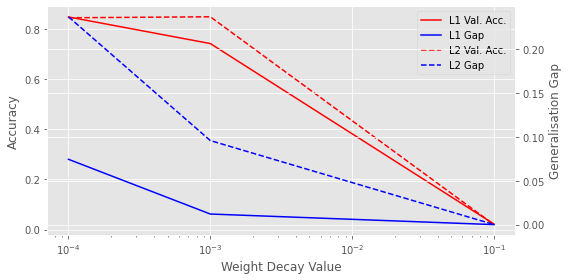

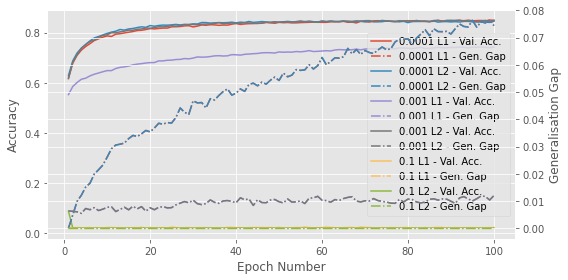

[0.8486708860759494, 0.74246835443038, 0.02189873417721516]
[0.0744350727699043, 0.012062786619419175, -1.4336727272024063e-07]
[0.8454430379746837, 0.8493037974683544, 0.019620253164556924]
[0.23690598364821197, 0.09580218279748148, 7.364867744641401e-05]


In [11]:
from mlp.penalties import L1Penalty, L2Penalty

penValues = [1.0e-4, 1.0e-3, 1.0e-1]

learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

l1_generalisation_gaps = []
l1_validation_accs = []
l2_generalisation_gaps = []
l2_validation_accs = []

for l1pen in penValues:
    l1term = L1Penalty(l1pen)
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, l1term, l1term), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l1term, l1term), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l1term, l1term), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, l1term, l1term)
    ]
    
    model = MultipleLayerModel(layers)
    
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    l1_validation_accs.append(acc_valid)
    l1_generalisation_gaps.append(err_valid - err_train)

for l2pen in penValues:
    l2term = L2Penalty(l2pen)
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, l2term, l2term), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l2term, l2term), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l2term, l2term), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, l2term, l2term)
    ]
    
    model = MultipleLayerModel(layers)
    
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    l2_validation_accs.append(acc_valid)
    l2_generalisation_gaps.append(err_valid - err_train)
    
    
l1_val_accs = []
l1_gen_gaps = []
l2_val_accs = []
l2_gen_gaps = []

for i in range(3):
    l1_val_accs.append(l1_validation_accs[i][-1])
    l1_gen_gaps.append(l1_generalisation_gaps[i][-1])
    l2_val_accs.append(l2_validation_accs[i][-1])
    l2_gen_gaps.append(l2_generalisation_gaps[i][-1])
    
    
epochNums = np.arange(1, num_epochs + 1) * stats_interval

fig_1 = plt.figure(figsize=(8,4))

ax_1 = fig_1.add_subplot(111)
ax_1.set_xscale('log')

ax_1.set_xlabel('Weight Decay Value')
ax_1.set_ylabel('Accuracy')

twin = ax_1.twinx()
twin.set_ylabel('Generalisation Gap')


p1, = ax_1.plot(penValues, l1_val_accs, "r-", label="L1 Val. Acc.")
p2, = twin.plot(penValues, l1_gen_gaps, "b-", label="L1 Gap")
p3, = ax_1.plot(penValues, l2_val_accs, "r--", label="L2 Val. Acc.")
p4, = twin.plot(penValues, l2_gen_gaps, "b--", label="L2 Gap")

ax_1.legend(handles= [p1,p2,p3,p4])
fig_1.tight_layout()
fig_1.savefig('penaltyFig.pdf')

fig_2 = plt.figure(figsize=(8,4))
ax_2 = fig_2.add_subplot(111)

ax_2.set_xlabel('Epoch Number')
ax_2.set_ylabel('Accuracy')

twin2 = ax_2.twinx()
twin2.set_ylabel('Generalisation Gap')

legend_handles = []
epochNums = np.arange(1, num_epochs + 1) * stats_interval


for i in range(len(penValues)):
    l1_valAccLineLabel = str(penValues[i]) + " L1 - Val. Acc."
    l1_genGapLineLabel = str(penValues[i]) + " L1 - Gen. Gap"
    l2_valAccLineLabel = str(penValues[i]) + " L2 - Val. Acc."
    l2_genGapLineLabel = str(penValues[i]) + " L2 - Gen. Gap"
    
    
    p1, = ax_2.plot(epochNums, l1_validation_accs[i], label=l1_valAccLineLabel)
    p2, = twin2.plot(epochNums, l1_generalisation_gaps[i], "-.", label=l1_genGapLineLabel)
    p3, = ax_2.plot(epochNums, l2_validation_accs[i], label=l2_valAccLineLabel)
    p4, = twin2.plot(epochNums, l1_generalisation_gaps[i], "-.", label=l2_genGapLineLabel)
    
    legend_handles += [p1, p2, p3, p4]
    
    
ax_2.legend(handles=legend_handles)
fig_2.tight_layout()
fig_2.savefig('penaltyFigTestEpochs.pdf')

plt.show()


print(l1_val_accs)
print(l1_gen_gaps)
print(l2_val_accs)
print(l2_gen_gaps)

#### Testing Combinations of Dropout and regularisation
##### First: 0.5 hidden layer dropout, 0.2 input layer dropout, and 1e-4 L2Regularisation

Experiment Configurations to try:
NOTE: Constants: 
0-no dropout no reg
1-0.5 dropout, 1e-6 L2 -- this is to test a value chosen in literature for dropout (jsut to prove a point), with a tiny amound of regularisation
2-0.95 D, 1e-4 L2
3-0.95 D, 1e-6 L1
4-0.95 D, 1e-5 L2
5-0.9 D, 1e-6 L2
6-0.9 D, 1e-6 L1

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.2s to complete
    error(train)=3.37e+00, acc(train)=2.06e-01, error(valid)=3.37e+00, acc(valid)=2.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.9s to complete
    error(train)=2.66e+00, acc(train)=3.41e-01, error(valid)=2.66e+00, acc(valid)=3.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=2.31e+00, acc(train)=4.24e-01, error(valid)=2.32e+00, acc(valid)=4.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.8s to complete
    error(train)=2.09e+00, acc(train)=4.67e-01, error(valid)=2.10e+00, acc(valid)=4.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.4s to complete
    error(train)=1.94e+00, acc(train)=4.97e-01, error(valid)=1.95e+00, acc(valid)=4.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.3s to complete
    error(train)=1.80e+00, acc(train)=5.29e-01, error(valid)=1.81e+00, acc(valid)=5.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.6s to complete
    error(train)=1.70e+00, acc(train)=5.54e-01, error(valid)=1.71e+00, acc(valid)=5.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.1s to complete
    error(train)=1.62e+00, acc(train)=5.71e-01, error(valid)=1.63e+00, acc(valid)=5.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.9s to complete
    error(train)=1.54e+00, acc(train)=5.88e-01, error(valid)=1.55e+00, acc(valid)=5.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.8s to complete
    error(train)=1.48e+00, acc(train)=6.01e-01, error(valid)=1.49e+00, acc(valid)=5.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.9s to complete
    error(train)=1.43e+00, acc(train)=6.13e-01, error(valid)=1.44e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.9s to complete
    error(train)=1.38e+00, acc(train)=6.22e-01, error(valid)=1.38e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.6s to complete
    error(train)=1.35e+00, acc(train)=6.30e-01, error(valid)=1.36e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.3s to complete
    error(train)=1.29e+00, acc(train)=6.39e-01, error(valid)=1.30e+00, acc(valid)=6.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.4s to complete
    error(train)=1.27e+00, acc(train)=6.47e-01, error(valid)=1.28e+00, acc(valid)=6.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.4s to complete
    error(train)=1.24e+00, acc(train)=6.50e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.7s to complete
    error(train)=1.20e+00, acc(train)=6.59e-01, error(valid)=1.21e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.9s to complete
    error(train)=1.18e+00, acc(train)=6.64e-01, error(valid)=1.19e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.8s to complete
    error(train)=1.15e+00, acc(train)=6.69e-01, error(valid)=1.16e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.7s to complete
    error(train)=1.13e+00, acc(train)=6.74e-01, error(valid)=1.15e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.6s to complete
    error(train)=1.10e+00, acc(train)=6.80e-01, error(valid)=1.12e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.8s to complete
    error(train)=1.09e+00, acc(train)=6.82e-01, error(valid)=1.10e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.9s to complete
    error(train)=1.08e+00, acc(train)=6.87e-01, error(valid)=1.09e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.9s to complete
    error(train)=1.06e+00, acc(train)=6.91e-01, error(valid)=1.08e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.9s to complete
    error(train)=1.05e+00, acc(train)=6.94e-01, error(valid)=1.06e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.6s to complete
    error(train)=1.03e+00, acc(train)=6.98e-01, error(valid)=1.04e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.5s to complete
    error(train)=1.02e+00, acc(train)=6.99e-01, error(valid)=1.03e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.3s to complete
    error(train)=9.98e-01, acc(train)=7.02e-01, error(valid)=1.01e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.3s to complete
    error(train)=9.89e-01, acc(train)=7.07e-01, error(valid)=1.00e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.4s to complete
    error(train)=9.81e-01, acc(train)=7.09e-01, error(valid)=9.99e-01, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.8s to complete
    error(train)=9.68e-01, acc(train)=7.12e-01, error(valid)=9.85e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.5s to complete
    error(train)=9.55e-01, acc(train)=7.13e-01, error(valid)=9.72e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.3s to complete
    error(train)=9.48e-01, acc(train)=7.15e-01, error(valid)=9.66e-01, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.4s to complete
    error(train)=9.37e-01, acc(train)=7.17e-01, error(valid)=9.55e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.6s to complete
    error(train)=9.32e-01, acc(train)=7.19e-01, error(valid)=9.51e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.8s to complete
    error(train)=9.23e-01, acc(train)=7.20e-01, error(valid)=9.40e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.3s to complete
    error(train)=9.09e-01, acc(train)=7.23e-01, error(valid)=9.28e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.6s to complete
    error(train)=9.05e-01, acc(train)=7.25e-01, error(valid)=9.24e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.8s to complete
    error(train)=8.97e-01, acc(train)=7.26e-01, error(valid)=9.16e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.7s to complete
    error(train)=8.90e-01, acc(train)=7.28e-01, error(valid)=9.09e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.1s to complete
    error(train)=8.77e-01, acc(train)=7.30e-01, error(valid)=8.97e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.4s to complete
    error(train)=8.80e-01, acc(train)=7.31e-01, error(valid)=9.00e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.0s to complete
    error(train)=8.69e-01, acc(train)=7.33e-01, error(valid)=8.89e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.4s to complete
    error(train)=8.64e-01, acc(train)=7.35e-01, error(valid)=8.85e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.9s to complete
    error(train)=8.56e-01, acc(train)=7.36e-01, error(valid)=8.78e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.6s to complete
    error(train)=8.50e-01, acc(train)=7.38e-01, error(valid)=8.72e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.7s to complete
    error(train)=8.47e-01, acc(train)=7.36e-01, error(valid)=8.69e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.8s to complete
    error(train)=8.43e-01, acc(train)=7.39e-01, error(valid)=8.65e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.9s to complete
    error(train)=8.37e-01, acc(train)=7.40e-01, error(valid)=8.59e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.8s to complete
    error(train)=8.26e-01, acc(train)=7.41e-01, error(valid)=8.48e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.0s to complete
    error(train)=8.25e-01, acc(train)=7.43e-01, error(valid)=8.46e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.0s to complete
    error(train)=8.21e-01, acc(train)=7.43e-01, error(valid)=8.42e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.4s to complete
    error(train)=8.14e-01, acc(train)=7.46e-01, error(valid)=8.36e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.1s to complete
    error(train)=8.14e-01, acc(train)=7.46e-01, error(valid)=8.36e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.3s to complete
    error(train)=8.07e-01, acc(train)=7.47e-01, error(valid)=8.29e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.0s to complete
    error(train)=8.03e-01, acc(train)=7.50e-01, error(valid)=8.26e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.1s to complete
    error(train)=7.99e-01, acc(train)=7.52e-01, error(valid)=8.23e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.1s to complete
    error(train)=7.96e-01, acc(train)=7.50e-01, error(valid)=8.19e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.0s to complete
    error(train)=7.90e-01, acc(train)=7.51e-01, error(valid)=8.14e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.2s to complete
    error(train)=7.90e-01, acc(train)=7.53e-01, error(valid)=8.14e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.8s to complete
    error(train)=7.83e-01, acc(train)=7.55e-01, error(valid)=8.08e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.1s to complete
    error(train)=7.79e-01, acc(train)=7.55e-01, error(valid)=8.04e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.9s to complete
    error(train)=7.77e-01, acc(train)=7.55e-01, error(valid)=8.03e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.3s to complete
    error(train)=7.71e-01, acc(train)=7.57e-01, error(valid)=7.96e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.7s to complete
    error(train)=7.70e-01, acc(train)=7.56e-01, error(valid)=7.96e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.5s to complete
    error(train)=7.66e-01, acc(train)=7.58e-01, error(valid)=7.93e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.7s to complete
    error(train)=7.67e-01, acc(train)=7.59e-01, error(valid)=7.93e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.6s to complete
    error(train)=7.60e-01, acc(train)=7.61e-01, error(valid)=7.88e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.6s to complete
    error(train)=7.60e-01, acc(train)=7.64e-01, error(valid)=7.88e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.7s to complete
    error(train)=7.55e-01, acc(train)=7.62e-01, error(valid)=7.83e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.4s to complete
    error(train)=7.52e-01, acc(train)=7.63e-01, error(valid)=7.81e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.9s to complete
    error(train)=7.53e-01, acc(train)=7.63e-01, error(valid)=7.82e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.7s to complete
    error(train)=7.50e-01, acc(train)=7.61e-01, error(valid)=7.79e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.7s to complete
    error(train)=7.41e-01, acc(train)=7.66e-01, error(valid)=7.69e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.8s to complete
    error(train)=7.40e-01, acc(train)=7.66e-01, error(valid)=7.69e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.6s to complete
    error(train)=7.35e-01, acc(train)=7.66e-01, error(valid)=7.64e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.7s to complete
    error(train)=7.36e-01, acc(train)=7.69e-01, error(valid)=7.65e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.8s to complete
    error(train)=7.33e-01, acc(train)=7.69e-01, error(valid)=7.63e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.8s to complete
    error(train)=7.29e-01, acc(train)=7.68e-01, error(valid)=7.60e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.7s to complete
    error(train)=7.26e-01, acc(train)=7.70e-01, error(valid)=7.57e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.7s to complete
    error(train)=7.26e-01, acc(train)=7.71e-01, error(valid)=7.57e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.7s to complete
    error(train)=7.22e-01, acc(train)=7.71e-01, error(valid)=7.53e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.7s to complete
    error(train)=7.18e-01, acc(train)=7.73e-01, error(valid)=7.50e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.6s to complete
    error(train)=7.17e-01, acc(train)=7.74e-01, error(valid)=7.50e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.7s to complete
    error(train)=7.17e-01, acc(train)=7.76e-01, error(valid)=7.49e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.1s to complete
    error(train)=7.14e-01, acc(train)=7.76e-01, error(valid)=7.47e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.8s to complete
    error(train)=7.12e-01, acc(train)=7.76e-01, error(valid)=7.46e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.4s to complete
    error(train)=7.12e-01, acc(train)=7.76e-01, error(valid)=7.46e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.8s to complete
    error(train)=7.08e-01, acc(train)=7.76e-01, error(valid)=7.42e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.7s to complete
    error(train)=7.04e-01, acc(train)=7.75e-01, error(valid)=7.38e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.6s to complete
    error(train)=7.05e-01, acc(train)=7.78e-01, error(valid)=7.39e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.7s to complete
    error(train)=7.00e-01, acc(train)=7.77e-01, error(valid)=7.35e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.8s to complete
    error(train)=7.03e-01, acc(train)=7.77e-01, error(valid)=7.37e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.8s to complete
    error(train)=6.99e-01, acc(train)=7.78e-01, error(valid)=7.34e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.7s to complete
    error(train)=6.99e-01, acc(train)=7.78e-01, error(valid)=7.35e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.8s to complete
    error(train)=6.96e-01, acc(train)=7.80e-01, error(valid)=7.31e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.0s to complete
    error(train)=6.91e-01, acc(train)=7.79e-01, error(valid)=7.26e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.7s to complete
    error(train)=6.92e-01, acc(train)=7.79e-01, error(valid)=7.27e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.7s to complete
    error(train)=6.89e-01, acc(train)=7.81e-01, error(valid)=7.25e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.6s to complete
    error(train)=6.86e-01, acc(train)=7.82e-01, error(valid)=7.21e-01, acc(valid)=7.69e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.0s to complete
    error(train)=1.46e+00, acc(train)=6.04e-01, error(valid)=1.46e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.3s to complete
    error(train)=1.18e+00, acc(train)=6.67e-01, error(valid)=1.18e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.2s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.2s to complete
    error(train)=9.34e-01, acc(train)=7.28e-01, error(valid)=9.46e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.1s to complete
    error(train)=8.59e-01, acc(train)=7.45e-01, error(valid)=8.71e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.1s to complete
    error(train)=8.03e-01, acc(train)=7.60e-01, error(valid)=8.18e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.3s to complete
    error(train)=7.48e-01, acc(train)=7.74e-01, error(valid)=7.67e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.2s to complete
    error(train)=7.12e-01, acc(train)=7.82e-01, error(valid)=7.33e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.3s to complete
    error(train)=6.77e-01, acc(train)=7.91e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.5s to complete
    error(train)=6.52e-01, acc(train)=7.98e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.3s to complete
    error(train)=6.28e-01, acc(train)=8.02e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=6.36e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.3s to complete
    error(train)=5.89e-01, acc(train)=8.14e-01, error(valid)=6.22e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.0s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.9s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.7s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.3s to complete
    error(train)=5.28e-01, acc(train)=8.29e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.6s to complete
    error(train)=5.19e-01, acc(train)=8.32e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.4s to complete
    error(train)=5.09e-01, acc(train)=8.35e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.9s to complete
    error(train)=5.00e-01, acc(train)=8.37e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.4s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.9s to complete
    error(train)=4.80e-01, acc(train)=8.42e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.1s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.3s to complete
    error(train)=4.65e-01, acc(train)=8.46e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.2s to complete
    error(train)=4.58e-01, acc(train)=8.48e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.2s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.3s to complete
    error(train)=4.47e-01, acc(train)=8.52e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.1s to complete
    error(train)=4.41e-01, acc(train)=8.52e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.4s to complete
    error(train)=4.34e-01, acc(train)=8.55e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.2s to complete
    error(train)=4.32e-01, acc(train)=8.55e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.2s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.5s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.3s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.4s to complete
    error(train)=4.11e-01, acc(train)=8.61e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.2s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.5s to complete
    error(train)=4.00e-01, acc(train)=8.63e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.2s to complete
    error(train)=3.96e-01, acc(train)=8.65e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.8s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.9s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.9s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.2s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.2s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.1s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.0s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.3s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=4.61e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.4s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.2s to complete
    error(train)=3.63e-01, acc(train)=8.74e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.0s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.2s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.1s to complete
    error(train)=3.56e-01, acc(train)=8.76e-01, error(valid)=4.52e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.1s to complete
    error(train)=3.52e-01, acc(train)=8.77e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.5s to complete
    error(train)=3.52e-01, acc(train)=8.77e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.1s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.46e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.0s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.1s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=4.47e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.0s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.8s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.9s to complete
    error(train)=3.36e-01, acc(train)=8.82e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.2s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=4.41e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.7s to complete
    error(train)=3.31e-01, acc(train)=8.84e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.7s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.8s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.9s to complete
    error(train)=3.25e-01, acc(train)=8.86e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.5s to complete
    error(train)=3.23e-01, acc(train)=8.86e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.1s to complete
    error(train)=3.21e-01, acc(train)=8.87e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.0s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.0s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.1s to complete
    error(train)=3.15e-01, acc(train)=8.89e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.2s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.2s to complete
    error(train)=3.12e-01, acc(train)=8.90e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.9s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.1s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.0s to complete
    error(train)=3.07e-01, acc(train)=8.91e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.0s to complete
    error(train)=3.07e-01, acc(train)=8.91e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.9s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.9s to complete
    error(train)=3.05e-01, acc(train)=8.91e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.9s to complete
    error(train)=3.03e-01, acc(train)=8.92e-01, error(valid)=4.29e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.9s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.7s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.8s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.9s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.2s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=4.26e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.1s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=4.26e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.9s to complete
    error(train)=2.92e-01, acc(train)=8.95e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.6s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.9s to complete
    error(train)=2.91e-01, acc(train)=8.95e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.1s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.1s to complete
    error(train)=2.88e-01, acc(train)=8.98e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.1s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.24e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.8s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=4.24e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.9s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.9s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.9s to complete
    error(train)=2.80e-01, acc(train)=8.99e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.1s to complete
    error(train)=2.79e-01, acc(train)=9.01e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.9s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.9s to complete
    error(train)=2.76e-01, acc(train)=9.02e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.1s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=4.21e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.9s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.2s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.9s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=4.22e-01, acc(valid)=8.60e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.9s to complete
    error(train)=1.47e+00, acc(train)=5.98e-01, error(valid)=1.48e+00, acc(valid)=5.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.7s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.8s to complete
    error(train)=1.04e+00, acc(train)=6.99e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.8s to complete
    error(train)=9.37e-01, acc(train)=7.26e-01, error(valid)=9.48e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.6s to complete
    error(train)=8.58e-01, acc(train)=7.47e-01, error(valid)=8.71e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.9s to complete
    error(train)=7.99e-01, acc(train)=7.60e-01, error(valid)=8.15e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.9s to complete
    error(train)=7.50e-01, acc(train)=7.74e-01, error(valid)=7.66e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.8s to complete
    error(train)=7.07e-01, acc(train)=7.85e-01, error(valid)=7.25e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.8s to complete
    error(train)=6.72e-01, acc(train)=7.92e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.8s to complete
    error(train)=6.43e-01, acc(train)=8.00e-01, error(valid)=6.65e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.8s to complete
    error(train)=6.17e-01, acc(train)=8.07e-01, error(valid)=6.42e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.7s to complete
    error(train)=5.98e-01, acc(train)=8.12e-01, error(valid)=6.24e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.9s to complete
    error(train)=5.80e-01, acc(train)=8.17e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.0s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.7s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.0s to complete
    error(train)=5.35e-01, acc(train)=8.28e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.9s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.0s to complete
    error(train)=5.15e-01, acc(train)=8.34e-01, error(valid)=5.53e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.0s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.9s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.0s to complete
    error(train)=4.83e-01, acc(train)=8.42e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.9s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.0s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.15e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.6s to complete
    error(train)=4.62e-01, acc(train)=8.47e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.0s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.9s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.9s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.9s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=4.90e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.0s to complete
    error(train)=4.28e-01, acc(train)=8.57e-01, error(valid)=4.88e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.9s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.8s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=4.82e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.7s to complete
    error(train)=4.11e-01, acc(train)=8.61e-01, error(valid)=4.78e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.4s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=4.75e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.3s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=4.71e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.1s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=4.68e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.9s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=4.68e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.9s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.0s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.9s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=4.63e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.8s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.7s to complete
    error(train)=3.75e-01, acc(train)=8.71e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.1s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.8s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=4.54e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.1s to complete
    error(train)=3.64e-01, acc(train)=8.75e-01, error(valid)=4.52e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.9s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.0s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=4.48e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.6s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.9s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.9s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.5s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.9s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.8s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.7s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.1s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.9s to complete
    error(train)=3.33e-01, acc(train)=8.83e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.9s to complete
    error(train)=3.31e-01, acc(train)=8.84e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.8s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=4.38e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.1s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.7s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.5s to complete
    error(train)=3.21e-01, acc(train)=8.86e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.0s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.7s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.6s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.9s to complete
    error(train)=3.12e-01, acc(train)=8.90e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.6s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.9s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.2s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.1s to complete
    error(train)=3.06e-01, acc(train)=8.91e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.7s to complete
    error(train)=3.02e-01, acc(train)=8.93e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.9s to complete
    error(train)=3.02e-01, acc(train)=8.93e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.1s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.2s to complete
    error(train)=2.98e-01, acc(train)=8.94e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.1s to complete
    error(train)=2.95e-01, acc(train)=8.96e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.8s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.8s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.7s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.7s to complete
    error(train)=2.89e-01, acc(train)=8.97e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.7s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.8s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.7s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.0s to complete
    error(train)=2.84e-01, acc(train)=8.98e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.9s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.7s to complete
    error(train)=2.81e-01, acc(train)=8.99e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.6s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.1s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.32e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.7s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.1s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.8s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=4.27e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.2s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.8s to complete
    error(train)=2.71e-01, acc(train)=9.03e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.1s to complete
    error(train)=2.69e-01, acc(train)=9.02e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.0s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.6s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.0s to complete
    error(train)=2.65e-01, acc(train)=9.04e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.7s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.9s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.9s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.0s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.0s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.5s to complete
    error(train)=2.57e-01, acc(train)=9.06e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.1s to complete
    error(train)=1.47e+00, acc(train)=5.98e-01, error(valid)=1.47e+00, acc(valid)=5.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=1.18e+00, acc(train)=6.67e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.0s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.04e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.9s to complete
    error(train)=9.33e-01, acc(train)=7.26e-01, error(valid)=9.43e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.0s to complete
    error(train)=8.51e-01, acc(train)=7.46e-01, error(valid)=8.64e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.8s to complete
    error(train)=7.92e-01, acc(train)=7.62e-01, error(valid)=8.05e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.1s to complete
    error(train)=7.42e-01, acc(train)=7.75e-01, error(valid)=7.59e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.1s to complete
    error(train)=7.02e-01, acc(train)=7.84e-01, error(valid)=7.19e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.2s to complete
    error(train)=6.68e-01, acc(train)=7.93e-01, error(valid)=6.88e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.1s to complete
    error(train)=6.39e-01, acc(train)=8.01e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.9s to complete
    error(train)=6.15e-01, acc(train)=8.06e-01, error(valid)=6.39e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.1s to complete
    error(train)=5.93e-01, acc(train)=8.12e-01, error(valid)=6.19e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.2s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.6s to complete
    error(train)=5.60e-01, acc(train)=8.21e-01, error(valid)=5.89e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.4s to complete
    error(train)=5.45e-01, acc(train)=8.25e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.0s to complete
    error(train)=5.32e-01, acc(train)=8.28e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.8s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.7s to complete
    error(train)=5.10e-01, acc(train)=8.34e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.9s to complete
    error(train)=4.99e-01, acc(train)=8.37e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.9s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.0s to complete
    error(train)=4.81e-01, acc(train)=8.42e-01, error(valid)=5.26e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.9s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.9s to complete
    error(train)=4.65e-01, acc(train)=8.46e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.0s to complete
    error(train)=4.61e-01, acc(train)=8.47e-01, error(valid)=5.10e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.9s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.0s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=4.98e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.1s to complete
    error(train)=4.40e-01, acc(train)=8.53e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.9s to complete
    error(train)=4.34e-01, acc(train)=8.54e-01, error(valid)=4.93e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.7s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=4.87e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.1s to complete
    error(train)=4.21e-01, acc(train)=8.58e-01, error(valid)=4.83e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.9s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=4.81e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.9s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=4.76e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.1s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=4.74e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.0s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.1s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.9s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=4.68e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.9s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.9s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=4.64e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.8s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.9s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.7s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.0s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.8s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.0s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.52e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.2s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.9s to complete
    error(train)=3.59e-01, acc(train)=8.75e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.8s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.8s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=4.46e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.7s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.8s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.8s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.7s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.8s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.0s to complete
    error(train)=3.35e-01, acc(train)=8.82e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.5s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.8s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.8s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.9s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.8s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.7s to complete
    error(train)=3.22e-01, acc(train)=8.87e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.6s to complete
    error(train)=3.20e-01, acc(train)=8.87e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.6s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.7s to complete
    error(train)=3.15e-01, acc(train)=8.89e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.7s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.7s to complete
    error(train)=3.12e-01, acc(train)=8.90e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.8s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.1s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=4.35e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.7s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.9s to complete
    error(train)=3.02e-01, acc(train)=8.93e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.9s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.7s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.8s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.5s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=4.26e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.4s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.5s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.7s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.4s to complete
    error(train)=2.89e-01, acc(train)=8.97e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.6s to complete
    error(train)=2.89e-01, acc(train)=8.96e-01, error(valid)=4.24e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.1s to complete
    error(train)=2.86e-01, acc(train)=8.97e-01, error(valid)=4.24e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.1s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.7s to complete
    error(train)=2.83e-01, acc(train)=8.98e-01, error(valid)=4.24e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.0s to complete
    error(train)=2.82e-01, acc(train)=8.98e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.1s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=4.24e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.3s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.6s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.4s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.24e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.6s to complete
    error(train)=2.75e-01, acc(train)=9.00e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.6s to complete
    error(train)=2.72e-01, acc(train)=9.01e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.7s to complete
    error(train)=2.71e-01, acc(train)=9.02e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.5s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.1s to complete
    error(train)=2.68e-01, acc(train)=9.03e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.6s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.24e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.5s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.25e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.6s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=4.21e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.7s to complete
    error(train)=2.65e-01, acc(train)=9.04e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.8s to complete
    error(train)=2.64e-01, acc(train)=9.04e-01, error(valid)=4.25e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.7s to complete
    error(train)=2.61e-01, acc(train)=9.06e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.5s to complete
    error(train)=2.61e-01, acc(train)=9.06e-01, error(valid)=4.22e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.7s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.4s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.9s to complete
    error(train)=1.58e+00, acc(train)=5.84e-01, error(valid)=1.59e+00, acc(valid)=5.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.0s to complete
    error(train)=1.27e+00, acc(train)=6.46e-01, error(valid)=1.28e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.1s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.11e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.0s to complete
    error(train)=1.00e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.3s to complete
    error(train)=9.18e-01, acc(train)=7.29e-01, error(valid)=9.25e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.0s to complete
    error(train)=8.53e-01, acc(train)=7.45e-01, error(valid)=8.61e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.0s to complete
    error(train)=8.05e-01, acc(train)=7.55e-01, error(valid)=8.16e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.9s to complete
    error(train)=7.55e-01, acc(train)=7.70e-01, error(valid)=7.67e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.0s to complete
    error(train)=7.23e-01, acc(train)=7.77e-01, error(valid)=7.39e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.1s to complete
    error(train)=6.92e-01, acc(train)=7.85e-01, error(valid)=7.10e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.2s to complete
    error(train)=6.66e-01, acc(train)=7.91e-01, error(valid)=6.85e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.7s to complete
    error(train)=6.41e-01, acc(train)=7.98e-01, error(valid)=6.63e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.3s to complete
    error(train)=6.26e-01, acc(train)=8.02e-01, error(valid)=6.48e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.1s to complete
    error(train)=6.06e-01, acc(train)=8.07e-01, error(valid)=6.32e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.1s to complete
    error(train)=5.91e-01, acc(train)=8.11e-01, error(valid)=6.19e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.0s to complete
    error(train)=5.77e-01, acc(train)=8.14e-01, error(valid)=6.07e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.2s to complete
    error(train)=5.65e-01, acc(train)=8.17e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.1s to complete
    error(train)=5.49e-01, acc(train)=8.21e-01, error(valid)=5.83e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.0s to complete
    error(train)=5.39e-01, acc(train)=8.24e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.0s to complete
    error(train)=5.30e-01, acc(train)=8.27e-01, error(valid)=5.67e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.9s to complete
    error(train)=5.20e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.0s to complete
    error(train)=5.13e-01, acc(train)=8.31e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.8s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.2s to complete
    error(train)=4.96e-01, acc(train)=8.36e-01, error(valid)=5.39e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.2s to complete
    error(train)=4.88e-01, acc(train)=8.37e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.3s to complete
    error(train)=4.81e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.2s to complete
    error(train)=4.76e-01, acc(train)=8.41e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.2s to complete
    error(train)=4.72e-01, acc(train)=8.42e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.2s to complete
    error(train)=4.66e-01, acc(train)=8.44e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.1s to complete
    error(train)=4.59e-01, acc(train)=8.46e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.1s to complete
    error(train)=4.52e-01, acc(train)=8.48e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.3s to complete
    error(train)=4.47e-01, acc(train)=8.49e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.5s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.4s to complete
    error(train)=4.37e-01, acc(train)=8.52e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.3s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.1s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.0s to complete
    error(train)=4.25e-01, acc(train)=8.55e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.0s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=4.82e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.2s to complete
    error(train)=4.18e-01, acc(train)=8.57e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.0s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.1s to complete
    error(train)=4.11e-01, acc(train)=8.59e-01, error(valid)=4.79e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.1s to complete
    error(train)=4.05e-01, acc(train)=8.61e-01, error(valid)=4.77e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.1s to complete
    error(train)=4.03e-01, acc(train)=8.61e-01, error(valid)=4.74e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.3s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=4.71e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.1s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.1s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.2s to complete
    error(train)=3.88e-01, acc(train)=8.66e-01, error(valid)=4.65e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.1s to complete
    error(train)=3.86e-01, acc(train)=8.67e-01, error(valid)=4.65e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.3s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=4.62e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.0s to complete
    error(train)=3.82e-01, acc(train)=8.67e-01, error(valid)=4.62e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.1s to complete
    error(train)=3.77e-01, acc(train)=8.68e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.1s to complete
    error(train)=3.76e-01, acc(train)=8.69e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.3s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.1s to complete
    error(train)=3.71e-01, acc(train)=8.70e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.0s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=4.53e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.2s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.9s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.53e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.2s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.1s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.2s to complete
    error(train)=3.56e-01, acc(train)=8.76e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.9s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.1s to complete
    error(train)=3.51e-01, acc(train)=8.76e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.8s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=4.45e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.5s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.3s to complete
    error(train)=3.45e-01, acc(train)=8.79e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.8s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.0s to complete
    error(train)=3.42e-01, acc(train)=8.80e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.2s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.0s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.1s to complete
    error(train)=3.34e-01, acc(train)=8.82e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.0s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.2s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.39e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.0s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.9s to complete
    error(train)=3.27e-01, acc(train)=8.84e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.3s to complete
    error(train)=3.25e-01, acc(train)=8.85e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.3s to complete
    error(train)=3.24e-01, acc(train)=8.86e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.9s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=4.35e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.1s to complete
    error(train)=3.23e-01, acc(train)=8.86e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.1s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.33e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.6s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.1s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.1s to complete
    error(train)=3.15e-01, acc(train)=8.87e-01, error(valid)=4.31e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.1s to complete
    error(train)=3.15e-01, acc(train)=8.87e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.2s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.1s to complete
    error(train)=3.13e-01, acc(train)=8.88e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.2s to complete
    error(train)=3.10e-01, acc(train)=8.89e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.1s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=4.28e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.3s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.5s to complete
    error(train)=3.09e-01, acc(train)=8.90e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.3s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.3s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.1s to complete
    error(train)=3.02e-01, acc(train)=8.91e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.2s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.2s to complete
    error(train)=3.02e-01, acc(train)=8.91e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.7s to complete
    error(train)=2.97e-01, acc(train)=8.93e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.9s to complete
    error(train)=2.98e-01, acc(train)=8.93e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.1s to complete
    error(train)=2.97e-01, acc(train)=8.93e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.1s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.1s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.6s to complete
    error(train)=1.62e+00, acc(train)=5.67e-01, error(valid)=1.62e+00, acc(valid)=5.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.8s to complete
    error(train)=1.27e+00, acc(train)=6.43e-01, error(valid)=1.27e+00, acc(valid)=6.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.9s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.7s to complete
    error(train)=9.99e-01, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.7s to complete
    error(train)=9.12e-01, acc(train)=7.31e-01, error(valid)=9.22e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.6s to complete
    error(train)=8.45e-01, acc(train)=7.47e-01, error(valid)=8.58e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.6s to complete
    error(train)=7.96e-01, acc(train)=7.60e-01, error(valid)=8.09e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.6s to complete
    error(train)=7.53e-01, acc(train)=7.70e-01, error(valid)=7.68e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.8s to complete
    error(train)=7.22e-01, acc(train)=7.77e-01, error(valid)=7.40e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.7s to complete
    error(train)=6.88e-01, acc(train)=7.87e-01, error(valid)=7.07e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.7s to complete
    error(train)=6.64e-01, acc(train)=7.92e-01, error(valid)=6.85e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.4s to complete
    error(train)=6.43e-01, acc(train)=7.98e-01, error(valid)=6.65e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.6s to complete
    error(train)=6.26e-01, acc(train)=8.03e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.5s to complete
    error(train)=6.04e-01, acc(train)=8.10e-01, error(valid)=6.31e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.5s to complete
    error(train)=5.90e-01, acc(train)=8.12e-01, error(valid)=6.18e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.7s to complete
    error(train)=5.72e-01, acc(train)=8.16e-01, error(valid)=6.01e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.7s to complete
    error(train)=5.63e-01, acc(train)=8.19e-01, error(valid)=5.93e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.7s to complete
    error(train)=5.47e-01, acc(train)=8.23e-01, error(valid)=5.78e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.5s to complete
    error(train)=5.38e-01, acc(train)=8.26e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.7s to complete
    error(train)=5.28e-01, acc(train)=8.28e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.8s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.7s to complete
    error(train)=5.09e-01, acc(train)=8.34e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.7s to complete
    error(train)=5.00e-01, acc(train)=8.36e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.7s to complete
    error(train)=4.92e-01, acc(train)=8.37e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.5s to complete
    error(train)=4.85e-01, acc(train)=8.40e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.6s to complete
    error(train)=4.77e-01, acc(train)=8.42e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.7s to complete
    error(train)=4.70e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.7s to complete
    error(train)=4.67e-01, acc(train)=8.45e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.3s to complete
    error(train)=4.58e-01, acc(train)=8.47e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.9s to complete
    error(train)=4.51e-01, acc(train)=8.49e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.4s to complete
    error(train)=4.46e-01, acc(train)=8.50e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.0s to complete
    error(train)=4.43e-01, acc(train)=8.51e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.8s to complete
    error(train)=4.36e-01, acc(train)=8.54e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.6s to complete
    error(train)=4.32e-01, acc(train)=8.55e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.9s to complete
    error(train)=4.27e-01, acc(train)=8.55e-01, error(valid)=4.85e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.6s to complete
    error(train)=4.22e-01, acc(train)=8.56e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.2s to complete
    error(train)=4.19e-01, acc(train)=8.57e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.1s to complete
    error(train)=4.17e-01, acc(train)=8.57e-01, error(valid)=4.81e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.2s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.0s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.1s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.0s to complete
    error(train)=4.00e-01, acc(train)=8.62e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.8s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.1s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=4.62e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.1s to complete
    error(train)=3.90e-01, acc(train)=8.64e-01, error(valid)=4.62e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.0s to complete
    error(train)=3.88e-01, acc(train)=8.66e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.4s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.7s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=4.56e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.7s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.6s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.7s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.9s to complete
    error(train)=3.70e-01, acc(train)=8.70e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.8s to complete
    error(train)=3.69e-01, acc(train)=8.72e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.6s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.2s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.1s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.9s to complete
    error(train)=3.59e-01, acc(train)=8.73e-01, error(valid)=4.44e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.0s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.9s to complete
    error(train)=3.52e-01, acc(train)=8.76e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.7s to complete
    error(train)=3.52e-01, acc(train)=8.76e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.0s to complete
    error(train)=3.49e-01, acc(train)=8.77e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.0s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.0s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.0s to complete
    error(train)=3.41e-01, acc(train)=8.80e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.1s to complete
    error(train)=3.39e-01, acc(train)=8.81e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.0s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.1s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.1s to complete
    error(train)=3.33e-01, acc(train)=8.82e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.8s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.1s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.2s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.0s to complete
    error(train)=3.25e-01, acc(train)=8.84e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.9s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.2s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.9s to complete
    error(train)=3.22e-01, acc(train)=8.85e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.0s to complete
    error(train)=3.21e-01, acc(train)=8.85e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.0s to complete
    error(train)=3.18e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.1s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.1s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.1s to complete
    error(train)=3.15e-01, acc(train)=8.87e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.1s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.0s to complete
    error(train)=3.11e-01, acc(train)=8.88e-01, error(valid)=4.24e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.1s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.7s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.24e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.9s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.0s to complete
    error(train)=3.05e-01, acc(train)=8.90e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.2s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.0s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.1s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=4.20e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.8s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.9s to complete
    error(train)=3.00e-01, acc(train)=8.91e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.0s to complete
    error(train)=3.03e-01, acc(train)=8.90e-01, error(valid)=4.27e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.0s to complete
    error(train)=2.97e-01, acc(train)=8.92e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.1s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=4.21e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.1s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=4.21e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.0s to complete
    error(train)=2.94e-01, acc(train)=8.94e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.8s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.8s to complete
    error(train)=2.91e-01, acc(train)=8.95e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.1s to complete
    error(train)=2.90e-01, acc(train)=8.94e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


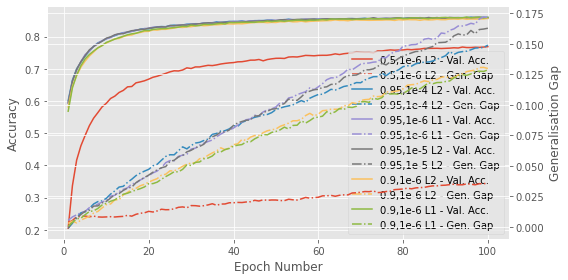

[0.7689873417721518, 0.8597468354430385, 0.8569620253164556, 0.8590506329113922, 0.8567721518987346, 0.8595569620253163]
[0.035481659082404415, 0.14890340750615894, 0.171543791149459, 0.1627364788028024, 0.12973654635515458, 0.12863884475366788]


In [5]:
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)


validation_accs = []
generalisation_gaps = []

combinationsToRun = [
    (0.5,1e-6,2),
    (0.95,1e-4,2),
    (0.95,1e-6,1),
    (0.95,1e-5,2),
    (0.9,1e-6,2),    
    (0.9,1e-6,1)
]


for comb in combinationsToRun:
    dropoutVal = comb[0]
    pen = None
    if comb[2] == 2:
        pen = L2Penalty(comb[1])
    else:
        pen = L1Penalty(comb[1])
        
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, pen, pen), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropoutVal, rng=rng),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, pen, pen), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropoutVal, rng=rng),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, pen, pen), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropoutVal, rng=rng),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, pen, pen)
    ]
    
    model = MultipleLayerModel(layers)
    
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

    
    validation_accs.append(acc_valid)
    generalisation_gaps.append(err_valid - err_train)

    
val_accs = []
gen_gaps = []

for i in range(len(validation_accs)):
    val_accs.append(validation_accs[i][-1])
    gen_gaps.append(generalisation_gaps[i][-1])
    
    
epochNums = np.arange(1, num_epochs + 1) * stats_interval

fig_2 = plt.figure(figsize=(8,4))
ax_2 = fig_2.add_subplot(111)

ax_2.set_xlabel('Epoch Number')
ax_2.set_ylabel('Accuracy')

twin2 = ax_2.twinx()
twin2.set_ylabel('Generalisation Gap')

legend_handles = []
epochNums = np.arange(1, num_epochs + 1) * stats_interval

# (0.5,1e-6,2),
#     (0.95,1e-4,2),
#     (0.95,1e-6,1),
#     (0.95,1e-5,2),
#     (0.9,1e-6,2),    
#     (0.9,1e-6,1)
config_labels = [
    "0.5,1e-6 L2",
    "0.95,1e-4 L2",
    "0.95,1e-6 L1",
    "0.95,1e-5 L2",
    "0.9,1e-6 L2",    
    "0.9,1e-6 L1"
]

for i in range(len(combinationsToRun)):
    valAccLineLabel = str(config_labels[i]) + " - Val. Acc."
    genGapLineLabel = str(config_labels[i]) + " - Gen. Gap"
    
    p1, = ax_2.plot(epochNums, validation_accs[i], label=valAccLineLabel)
    p2, = twin2.plot(epochNums, generalisation_gaps[i], "-.", label=genGapLineLabel)
    
    legend_handles += [p1, p2]
    
    
ax_2.legend(handles=legend_handles)
fig_2.tight_layout()
fig_2.savefig('combinationFig.pdf')

plt.show()


print(val_accs)
print(gen_gaps)


# ## BASELINE PERFORMANCE
# layers = [
#         AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#         ReluLayer(),
#         AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#         ReluLayer(),
#         AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#         ReluLayer(),
#         AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
#     ]
    
# model = MultipleLayerModel(layers)

# err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
# print("BASELINE: Val_acc then gap")
# print(acc_valid[-1])
# print(err_valid[-1] - err_train[-1])
# l2Reg = L2Penalty(0.001)

# comb1Layers = [
#     DropoutLayer(incl_prob=0.8, rng=rng),
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init, l2Reg), 
#     ReluLayer(),
#     DropoutLayer(incl_prob=0.5, rng=rng),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l2Reg), 
#     ReluLayer(),
#     DropoutLayer(incl_prob=0.5, rng=rng),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l2Reg), 
#     ReluLayer(),
#     DropoutLayer(incl_prob=0.5, rng=rng),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init, l2Reg)
# ]

# model = MultipleLayerModel(layers)
    
# err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
# # FIrst things first, print stuff for the table
# print("For L2Reg: 0.001 and dropout 0.8 at input and 0.5 at each layer:")
# print("Validation Accuracy:",acc_valid[-1])
# print("Generalisation gap:",err_valid[-1] - err_train[-1])



In [13]:
## Running the best configuration found, on the test set.
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

test_set = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fcd783b9250>)


In [14]:


layers = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, pen, pen), 
    ReluLayer(),
    DropoutLayer(incl_prob=dropoutVal, rng=rng),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, pen, pen), 
    ReluLayer(),
    DropoutLayer(incl_prob=dropoutVal, rng=rng),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, pen, pen), 
    ReluLayer(),
    DropoutLayer(incl_prob=dropoutVal, rng=rng),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, pen, pen)
]

model = MultipleLayerModel(layers)

test_set_stats = train_model_return_test_set_performance(
    model, error, learning_rule, train_data, valid_data, test_set, num_epochs, stats_interval, notebook=True)



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.1s to complete
    error(train)=1.61e+00, acc(train)=5.71e-01, error(valid)=1.62e+00, acc(valid)=5.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.3s to complete
    error(train)=1.28e+00, acc(train)=6.41e-01, error(valid)=1.29e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.8s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.3s to complete
    error(train)=9.96e-01, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.9s to complete
    error(train)=9.10e-01, acc(train)=7.29e-01, error(valid)=9.21e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.8s to complete
    error(train)=8.45e-01, acc(train)=7.47e-01, error(valid)=8.60e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.9s to complete
    error(train)=7.94e-01, acc(train)=7.59e-01, error(valid)=8.09e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.4s to complete
    error(train)=7.52e-01, acc(train)=7.68e-01, error(valid)=7.70e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.1s to complete
    error(train)=7.15e-01, acc(train)=7.80e-01, error(valid)=7.34e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.1s to complete
    error(train)=6.84e-01, acc(train)=7.86e-01, error(valid)=7.04e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.9s to complete
    error(train)=6.61e-01, acc(train)=7.92e-01, error(valid)=6.83e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.1s to complete
    error(train)=6.37e-01, acc(train)=7.99e-01, error(valid)=6.60e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.8s to complete
    error(train)=6.15e-01, acc(train)=8.04e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.6s to complete
    error(train)=6.01e-01, acc(train)=8.08e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.2s to complete
    error(train)=5.85e-01, acc(train)=8.13e-01, error(valid)=6.13e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.7s to complete
    error(train)=5.68e-01, acc(train)=8.17e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.8s to complete
    error(train)=5.56e-01, acc(train)=8.21e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.9s to complete
    error(train)=5.45e-01, acc(train)=8.24e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.1s to complete
    error(train)=5.32e-01, acc(train)=8.27e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.7s to complete
    error(train)=5.23e-01, acc(train)=8.29e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.2s to complete
    error(train)=5.13e-01, acc(train)=8.32e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.0s to complete
    error(train)=5.08e-01, acc(train)=8.33e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.9s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.7s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.8s to complete
    error(train)=4.83e-01, acc(train)=8.40e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.8s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.9s to complete
    error(train)=4.67e-01, acc(train)=8.45e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.0s to complete
    error(train)=4.64e-01, acc(train)=8.44e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.0s to complete
    error(train)=4.60e-01, acc(train)=8.46e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.8s to complete
    error(train)=4.51e-01, acc(train)=8.49e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.5s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.5s to complete
    error(train)=4.41e-01, acc(train)=8.51e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.5s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.7s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.8s to complete
    error(train)=4.26e-01, acc(train)=8.56e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.7s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.6s to complete
    error(train)=4.20e-01, acc(train)=8.57e-01, error(valid)=4.82e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.5s to complete
    error(train)=4.14e-01, acc(train)=8.59e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.7s to complete
    error(train)=4.10e-01, acc(train)=8.60e-01, error(valid)=4.74e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.3s to complete
    error(train)=4.08e-01, acc(train)=8.60e-01, error(valid)=4.74e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.5s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=4.69e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.3s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.6s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=4.64e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.7s to complete
    error(train)=3.94e-01, acc(train)=8.65e-01, error(valid)=4.65e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.7s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.5s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.8s to complete
    error(train)=3.84e-01, acc(train)=8.68e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.7s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=4.60e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.6s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=4.53e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.6s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.5s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.4s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.8s to complete
    error(train)=3.67e-01, acc(train)=8.72e-01, error(valid)=4.49e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.8s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.6s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.5s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.6s to complete
    error(train)=3.58e-01, acc(train)=8.75e-01, error(valid)=4.44e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.5s to complete
    error(train)=3.57e-01, acc(train)=8.75e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.4s to complete
    error(train)=3.52e-01, acc(train)=8.77e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.5s to complete
    error(train)=3.51e-01, acc(train)=8.77e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.8s to complete
    error(train)=3.48e-01, acc(train)=8.78e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.5s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=4.40e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.3s to complete
    error(train)=3.45e-01, acc(train)=8.79e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.8s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.6s to complete
    error(train)=3.41e-01, acc(train)=8.80e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.5s to complete
    error(train)=3.39e-01, acc(train)=8.81e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.8s to complete
    error(train)=3.38e-01, acc(train)=8.81e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.6s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.4s to complete
    error(train)=3.34e-01, acc(train)=8.82e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.7s to complete
    error(train)=3.32e-01, acc(train)=8.83e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.4s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.9s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.6s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.6s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.4s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.4s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.3s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.4s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.3s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.6s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.4s to complete
    error(train)=3.15e-01, acc(train)=8.87e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.5s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.4s to complete
    error(train)=3.11e-01, acc(train)=8.89e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.6s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.3s to complete
    error(train)=3.09e-01, acc(train)=8.90e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.3s to complete
    error(train)=3.07e-01, acc(train)=8.89e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.6s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.3s to complete
    error(train)=3.06e-01, acc(train)=8.90e-01, error(valid)=4.24e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.5s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.5s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.7s to complete
    error(train)=3.00e-01, acc(train)=8.92e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.5s to complete
    error(train)=3.02e-01, acc(train)=8.91e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.4s to complete
    error(train)=2.98e-01, acc(train)=8.93e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.7s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.8s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=4.21e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.5s to complete
    error(train)=2.94e-01, acc(train)=8.94e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.2s to complete
    error(train)=2.95e-01, acc(train)=8.94e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.3s to complete
    error(train)=2.93e-01, acc(train)=8.94e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.5s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.4s to complete
    error(train)=2.91e-01, acc(train)=8.95e-01, error(valid)=4.18e-01, acc(valid)=8.59e-01


OrderedDict([('error(test)', 0.45312841140618104), ('acc(test)', 0.8458227848101265)])


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.9s to complete
    error(train)=1.44e+00, acc(train)=6.03e-01, error(valid)=1.44e+00, acc(valid)=5.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.3s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.2s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.04e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.5s to complete
    error(train)=9.29e-01, acc(train)=7.29e-01, error(valid)=9.41e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.7s to complete
    error(train)=8.47e-01, acc(train)=7.50e-01, error(valid)=8.57e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.9s to complete
    error(train)=7.86e-01, acc(train)=7.65e-01, error(valid)=7.99e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.3s to complete
    error(train)=7.33e-01, acc(train)=7.79e-01, error(valid)=7.49e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.4s to complete
    error(train)=6.92e-01, acc(train)=7.89e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.7s to complete
    error(train)=6.58e-01, acc(train)=7.97e-01, error(valid)=6.77e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.5s to complete
    error(train)=6.30e-01, acc(train)=8.04e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.6s to complete
    error(train)=6.08e-01, acc(train)=8.10e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.3s to complete
    error(train)=5.86e-01, acc(train)=8.16e-01, error(valid)=6.13e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.4s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.3s to complete
    error(train)=5.51e-01, acc(train)=8.23e-01, error(valid)=5.84e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.0s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.6s to complete
    error(train)=5.27e-01, acc(train)=8.32e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.3s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.0s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.8s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.9s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.0s to complete
    error(train)=4.75e-01, acc(train)=8.45e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.5s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.4s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.1s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.2s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.9s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.0s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.7s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.0s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.6s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.3s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.6s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.5s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.4s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.9s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.5s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=4.71e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.5s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.6s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.6s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=4.64e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.4s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.3s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.7s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.3s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.1s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.5s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.3s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.3s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=4.53e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.0s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=4.52e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.6s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.8s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.7s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.7s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.5s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.7s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.49e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.8s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.6s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=4.45e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.8s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.7s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.6s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.2s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.9s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=4.41e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.6s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.0s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.3s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.7s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.8s to complete
    error(train)=3.05e-01, acc(train)=8.94e-01, error(valid)=4.38e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.2s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.6s to complete
    error(train)=3.02e-01, acc(train)=8.94e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.3s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.6s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=4.37e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=4.39e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.3s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=4.36e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.7s to complete
    error(train)=2.91e-01, acc(train)=8.98e-01, error(valid)=4.36e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.5s to complete
    error(train)=2.90e-01, acc(train)=8.98e-01, error(valid)=4.38e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.6s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.5s to complete
    error(train)=2.88e-01, acc(train)=8.98e-01, error(valid)=4.36e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.6s to complete
    error(train)=2.85e-01, acc(train)=8.99e-01, error(valid)=4.35e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.4s to complete
    error(train)=2.84e-01, acc(train)=9.00e-01, error(valid)=4.35e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.8s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=4.32e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.7s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.6s to complete
    error(train)=2.79e-01, acc(train)=9.01e-01, error(valid)=4.35e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.4s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=4.31e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.6s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=4.34e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.5s to complete
    error(train)=2.75e-01, acc(train)=9.02e-01, error(valid)=4.34e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.4s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=4.34e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.0s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=4.33e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.1s to complete
    error(train)=2.71e-01, acc(train)=9.04e-01, error(valid)=4.34e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.9s to complete
    error(train)=2.69e-01, acc(train)=9.04e-01, error(valid)=4.33e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.5s to complete
    error(train)=2.68e-01, acc(train)=9.04e-01, error(valid)=4.33e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.3s to complete
    error(train)=2.64e-01, acc(train)=9.06e-01, error(valid)=4.33e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.3s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=4.34e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.0s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=4.36e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.2s to complete
    error(train)=2.63e-01, acc(train)=9.06e-01, error(valid)=4.34e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.3s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=4.35e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.5s to complete
    error(train)=2.58e-01, acc(train)=9.08e-01, error(valid)=4.32e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.8s to complete
    error(train)=2.57e-01, acc(train)=9.08e-01, error(valid)=4.32e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.0s to complete
    error(train)=2.58e-01, acc(train)=9.08e-01, error(valid)=4.35e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.3s to complete
    error(train)=2.56e-01, acc(train)=9.08e-01, error(valid)=4.32e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.2s to complete
    error(train)=2.54e-01, acc(train)=9.09e-01, error(valid)=4.33e-01, acc(valid)=8.58e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.5s to complete
    error(train)=1.51e+00, acc(train)=5.89e-01, error(valid)=1.52e+00, acc(valid)=5.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.4s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.6s to complete
    error(train)=1.05e+00, acc(train)=6.97e-01, error(valid)=1.05e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.3s to complete
    error(train)=9.33e-01, acc(train)=7.25e-01, error(valid)=9.45e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.0s to complete
    error(train)=8.52e-01, acc(train)=7.46e-01, error(valid)=8.66e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.6s to complete
    error(train)=7.91e-01, acc(train)=7.61e-01, error(valid)=8.07e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.6s to complete
    error(train)=7.43e-01, acc(train)=7.73e-01, error(valid)=7.60e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.7s to complete
    error(train)=7.04e-01, acc(train)=7.84e-01, error(valid)=7.23e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.8s to complete
    error(train)=6.72e-01, acc(train)=7.91e-01, error(valid)=6.94e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.5s to complete
    error(train)=6.44e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.9s to complete
    error(train)=6.17e-01, acc(train)=8.06e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.1s to complete
    error(train)=5.95e-01, acc(train)=8.11e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.6s to complete
    error(train)=5.79e-01, acc(train)=8.16e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.4s to complete
    error(train)=5.61e-01, acc(train)=8.20e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.8s to complete
    error(train)=5.47e-01, acc(train)=8.24e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.5s to complete
    error(train)=5.30e-01, acc(train)=8.29e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.2s to complete
    error(train)=5.18e-01, acc(train)=8.31e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.8s to complete
    error(train)=5.08e-01, acc(train)=8.34e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.3s to complete
    error(train)=5.02e-01, acc(train)=8.36e-01, error(valid)=5.48e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.2s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=5.38e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.5s to complete
    error(train)=4.79e-01, acc(train)=8.42e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.1s to complete
    error(train)=4.68e-01, acc(train)=8.45e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.9s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.2s to complete
    error(train)=4.57e-01, acc(train)=8.48e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.7s to complete
    error(train)=4.50e-01, acc(train)=8.50e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.4s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.01e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.2s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.4s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.3s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=4.89e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.0s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=4.84e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.3s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.9s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.5s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=4.78e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.6s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=4.76e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.8s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=4.72e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.7s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=4.70e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.9s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.9s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=4.64e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.8s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.6s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=4.63e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.5s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.4s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=4.58e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.7s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=4.57e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.0s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.9s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.0s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.0s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.2s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.6s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.3s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=4.46e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.1s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.48e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.4s to complete
    error(train)=3.39e-01, acc(train)=8.81e-01, error(valid)=4.48e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.4s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.6s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.4s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.7s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=4.45e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.6s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.6s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.7s to complete
    error(train)=3.22e-01, acc(train)=8.87e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.8s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.7s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=3.16e-01, acc(train)=8.89e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.8s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.8s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.7s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.7s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.9s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.7s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.0s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.2s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.4s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.6s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.4s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.4s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.4s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=4.34e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.4s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.6s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.5s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.4s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.5s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.4s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.4s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.4s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.4s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.4s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.6s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=4.32e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.4s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.4s to complete
    error(train)=2.72e-01, acc(train)=9.03e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.5s to complete
    error(train)=2.71e-01, acc(train)=9.02e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.7s to complete
    error(train)=2.70e-01, acc(train)=9.04e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.4s to complete
    error(train)=2.68e-01, acc(train)=9.04e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.4s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.4s to complete
    error(train)=2.66e-01, acc(train)=9.04e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.4s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.4s to complete
    error(train)=2.65e-01, acc(train)=9.04e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.4s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.4s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.4s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.4s to complete
    error(train)=2.57e-01, acc(train)=9.06e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.4s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.49e+00, acc(train)=5.99e-01, error(valid)=1.49e+00, acc(valid)=5.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.7s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.05e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.6s to complete
    error(train)=9.50e-01, acc(train)=7.25e-01, error(valid)=9.60e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.7s to complete
    error(train)=8.69e-01, acc(train)=7.46e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.5s to complete
    error(train)=8.12e-01, acc(train)=7.59e-01, error(valid)=8.26e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.6s to complete
    error(train)=7.67e-01, acc(train)=7.70e-01, error(valid)=7.82e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.7s to complete
    error(train)=7.31e-01, acc(train)=7.78e-01, error(valid)=7.50e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.7s to complete
    error(train)=7.01e-01, acc(train)=7.86e-01, error(valid)=7.22e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.8s to complete
    error(train)=6.78e-01, acc(train)=7.91e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.7s to complete
    error(train)=6.54e-01, acc(train)=7.99e-01, error(valid)=6.77e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.7s to complete
    error(train)=6.33e-01, acc(train)=8.04e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.7s to complete
    error(train)=6.19e-01, acc(train)=8.06e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.4s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.7s to complete
    error(train)=5.90e-01, acc(train)=8.14e-01, error(valid)=6.20e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.2s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=6.10e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.0s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.6s to complete
    error(train)=5.56e-01, acc(train)=8.23e-01, error(valid)=5.89e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.8s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.8s to complete
    error(train)=5.39e-01, acc(train)=8.29e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.0s to complete
    error(train)=5.31e-01, acc(train)=8.29e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.8s to complete
    error(train)=5.25e-01, acc(train)=8.31e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.8s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.8s to complete
    error(train)=5.11e-01, acc(train)=8.34e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.8s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.0s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.8s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.8s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.0s to complete
    error(train)=4.87e-01, acc(train)=8.41e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.8s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.9s to complete
    error(train)=4.79e-01, acc(train)=8.44e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.8s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.6s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.8s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.7s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.2s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.9s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.9s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.8s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.8s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.1s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.0s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.0s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.8s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.7s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.7s to complete
    error(train)=4.36e-01, acc(train)=8.54e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.8s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.9s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=4.81e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.9s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.1s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.0s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=4.72e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.1s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.3s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.0s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.0s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.2s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.2s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.8s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.3s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=4.67e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.5s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.9s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=4.63e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.9s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.8s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.8s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.7s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.7s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.3s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.5s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.5s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.1s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.2s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.2s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.1s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.9s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.4s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.3s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.5s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=4.50e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.4s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=4.44e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.5s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.0s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.2s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.9s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.2s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.7s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.2s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.3s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.41e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.4s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.2s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.3s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.5s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.4s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.3s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.40e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.3s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.5s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.2s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.3s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.4s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=4.35e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.4s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.3s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=4.34e-01, acc(valid)=8.56e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.1s to complete
    error(train)=1.62e+00, acc(train)=5.64e-01, error(valid)=1.63e+00, acc(valid)=5.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.0s to complete
    error(train)=1.28e+00, acc(train)=6.39e-01, error(valid)=1.29e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.1s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.12e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.4s to complete
    error(train)=1.00e+00, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.2s to complete
    error(train)=9.24e-01, acc(train)=7.28e-01, error(valid)=9.32e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.5s to complete
    error(train)=8.56e-01, acc(train)=7.43e-01, error(valid)=8.67e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.6s to complete
    error(train)=8.03e-01, acc(train)=7.57e-01, error(valid)=8.15e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.4s to complete
    error(train)=7.58e-01, acc(train)=7.71e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.3s to complete
    error(train)=7.21e-01, acc(train)=7.79e-01, error(valid)=7.38e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.3s to complete
    error(train)=6.91e-01, acc(train)=7.85e-01, error(valid)=7.10e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.4s to complete
    error(train)=6.65e-01, acc(train)=7.93e-01, error(valid)=6.85e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.3s to complete
    error(train)=6.42e-01, acc(train)=7.97e-01, error(valid)=6.65e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.1s to complete
    error(train)=6.22e-01, acc(train)=8.02e-01, error(valid)=6.46e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.8s to complete
    error(train)=6.08e-01, acc(train)=8.06e-01, error(valid)=6.36e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.7s to complete
    error(train)=5.89e-01, acc(train)=8.11e-01, error(valid)=6.18e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.5s to complete
    error(train)=5.76e-01, acc(train)=8.15e-01, error(valid)=6.07e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.0s to complete
    error(train)=5.62e-01, acc(train)=8.18e-01, error(valid)=5.95e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.7s to complete
    error(train)=5.49e-01, acc(train)=8.22e-01, error(valid)=5.82e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.7s to complete
    error(train)=5.38e-01, acc(train)=8.25e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.7s to complete
    error(train)=5.31e-01, acc(train)=8.25e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.5s to complete
    error(train)=5.19e-01, acc(train)=8.30e-01, error(valid)=5.56e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.7s to complete
    error(train)=5.09e-01, acc(train)=8.32e-01, error(valid)=5.48e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.6s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=5.45e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.5s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.8s to complete
    error(train)=4.90e-01, acc(train)=8.38e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.5s to complete
    error(train)=4.81e-01, acc(train)=8.40e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.5s to complete
    error(train)=4.75e-01, acc(train)=8.41e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.7s to complete
    error(train)=4.74e-01, acc(train)=8.42e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.9s to complete
    error(train)=4.66e-01, acc(train)=8.45e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.5s to complete
    error(train)=4.61e-01, acc(train)=8.45e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.9s to complete
    error(train)=4.54e-01, acc(train)=8.48e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.0s to complete
    error(train)=4.50e-01, acc(train)=8.50e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.6s to complete
    error(train)=4.45e-01, acc(train)=8.50e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.6s to complete
    error(train)=4.42e-01, acc(train)=8.51e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.6s to complete
    error(train)=4.38e-01, acc(train)=8.53e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.9s to complete
    error(train)=4.32e-01, acc(train)=8.54e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.6s to complete
    error(train)=4.26e-01, acc(train)=8.56e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.6s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.6s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.8s to complete
    error(train)=4.16e-01, acc(train)=8.59e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.7s to complete
    error(train)=4.14e-01, acc(train)=8.59e-01, error(valid)=4.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.4s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.7s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.6s to complete
    error(train)=4.05e-01, acc(train)=8.61e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.5s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.4s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.4s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.8s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.6s to complete
    error(train)=3.90e-01, acc(train)=8.66e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.7s to complete
    error(train)=3.89e-01, acc(train)=8.65e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.4s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.5s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.5s to complete
    error(train)=3.82e-01, acc(train)=8.68e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.5s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=4.52e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.6s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.5s to complete
    error(train)=3.74e-01, acc(train)=8.71e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.6s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.7s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.4s to complete
    error(train)=3.67e-01, acc(train)=8.71e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.4s to complete
    error(train)=3.67e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.6s to complete
    error(train)=3.63e-01, acc(train)=8.74e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.5s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=4.44e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.4s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.5s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.4s to complete
    error(train)=3.56e-01, acc(train)=8.75e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.4s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.5s to complete
    error(train)=3.52e-01, acc(train)=8.77e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.4s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.5s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=4.37e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.5s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.4s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.6s to complete
    error(train)=3.42e-01, acc(train)=8.80e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.6s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.4s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.7s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.5s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.4s to complete
    error(train)=3.40e-01, acc(train)=8.81e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.5s to complete
    error(train)=3.35e-01, acc(train)=8.82e-01, error(valid)=4.29e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.4s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.28e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.4s to complete
    error(train)=3.33e-01, acc(train)=8.82e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.6s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.7s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.3s to complete
    error(train)=3.29e-01, acc(train)=8.84e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.3s to complete
    error(train)=3.27e-01, acc(train)=8.84e-01, error(valid)=4.24e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.6s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.28e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.3s to complete
    error(train)=3.25e-01, acc(train)=8.85e-01, error(valid)=4.24e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.7s to complete
    error(train)=3.24e-01, acc(train)=8.85e-01, error(valid)=4.22e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.6s to complete
    error(train)=3.22e-01, acc(train)=8.86e-01, error(valid)=4.22e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.4s to complete
    error(train)=3.24e-01, acc(train)=8.86e-01, error(valid)=4.25e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.5s to complete
    error(train)=3.21e-01, acc(train)=8.86e-01, error(valid)=4.22e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.3s to complete
    error(train)=3.19e-01, acc(train)=8.87e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.3s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.3s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.2s to complete
    error(train)=3.17e-01, acc(train)=8.88e-01, error(valid)=4.20e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.4s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=4.21e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.5s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.3s to complete
    error(train)=3.13e-01, acc(train)=8.89e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.4s to complete
    error(train)=3.13e-01, acc(train)=8.89e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.5s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.6s to complete
    error(train)=3.10e-01, acc(train)=8.89e-01, error(valid)=4.17e-01, acc(valid)=8.57e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.1s to complete
    error(train)=1.99e+00, acc(train)=5.00e-01, error(valid)=2.00e+00, acc(valid)=4.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.1s to complete
    error(train)=1.50e+00, acc(train)=6.01e-01, error(valid)=1.50e+00, acc(valid)=5.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.30e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.0s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=1.07e+00, acc(train)=6.90e-01, error(valid)=1.08e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.1s to complete
    error(train)=9.92e-01, acc(train)=7.09e-01, error(valid)=1.00e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.0s to complete
    error(train)=9.38e-01, acc(train)=7.24e-01, error(valid)=9.48e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.1s to complete
    error(train)=8.82e-01, acc(train)=7.36e-01, error(valid)=8.93e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.1s to complete
    error(train)=8.42e-01, acc(train)=7.44e-01, error(valid)=8.54e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.0s to complete
    error(train)=8.06e-01, acc(train)=7.57e-01, error(valid)=8.20e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.9s to complete
    error(train)=7.78e-01, acc(train)=7.63e-01, error(valid)=7.94e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=7.55e-01, acc(train)=7.69e-01, error(valid)=7.72e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.9s to complete
    error(train)=7.26e-01, acc(train)=7.76e-01, error(valid)=7.46e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.2s to complete
    error(train)=7.04e-01, acc(train)=7.80e-01, error(valid)=7.24e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.9s to complete
    error(train)=6.83e-01, acc(train)=7.85e-01, error(valid)=7.06e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.8s to complete
    error(train)=6.67e-01, acc(train)=7.90e-01, error(valid)=6.90e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.0s to complete
    error(train)=6.55e-01, acc(train)=7.93e-01, error(valid)=6.78e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.9s to complete
    error(train)=6.40e-01, acc(train)=7.98e-01, error(valid)=6.65e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.9s to complete
    error(train)=6.29e-01, acc(train)=8.00e-01, error(valid)=6.56e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.9s to complete
    error(train)=6.16e-01, acc(train)=8.02e-01, error(valid)=6.44e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.9s to complete
    error(train)=6.04e-01, acc(train)=8.05e-01, error(valid)=6.33e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.9s to complete
    error(train)=5.94e-01, acc(train)=8.10e-01, error(valid)=6.24e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.2s to complete
    error(train)=5.89e-01, acc(train)=8.09e-01, error(valid)=6.20e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.0s to complete
    error(train)=5.82e-01, acc(train)=8.12e-01, error(valid)=6.15e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.0s to complete
    error(train)=5.68e-01, acc(train)=8.16e-01, error(valid)=6.02e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.8s to complete
    error(train)=5.61e-01, acc(train)=8.18e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.8s to complete
    error(train)=5.57e-01, acc(train)=8.18e-01, error(valid)=5.94e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.1s to complete
    error(train)=5.49e-01, acc(train)=8.21e-01, error(valid)=5.85e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.9s to complete
    error(train)=5.42e-01, acc(train)=8.21e-01, error(valid)=5.81e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.8s to complete
    error(train)=5.37e-01, acc(train)=8.23e-01, error(valid)=5.76e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.0s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.69e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.9s to complete
    error(train)=5.27e-01, acc(train)=8.26e-01, error(valid)=5.67e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.0s to complete
    error(train)=5.23e-01, acc(train)=8.27e-01, error(valid)=5.64e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.9s to complete
    error(train)=5.13e-01, acc(train)=8.29e-01, error(valid)=5.55e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.8s to complete
    error(train)=5.11e-01, acc(train)=8.30e-01, error(valid)=5.54e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.9s to complete
    error(train)=5.07e-01, acc(train)=8.31e-01, error(valid)=5.50e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.9s to complete
    error(train)=5.00e-01, acc(train)=8.32e-01, error(valid)=5.45e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.9s to complete
    error(train)=4.97e-01, acc(train)=8.34e-01, error(valid)=5.42e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.0s to complete
    error(train)=4.92e-01, acc(train)=8.34e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.9s to complete
    error(train)=4.92e-01, acc(train)=8.34e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.9s to complete
    error(train)=4.86e-01, acc(train)=8.37e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.0s to complete
    error(train)=4.82e-01, acc(train)=8.38e-01, error(valid)=5.29e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.0s to complete
    error(train)=4.79e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.5s to complete
    error(train)=4.74e-01, acc(train)=8.40e-01, error(valid)=5.23e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.8s to complete
    error(train)=4.71e-01, acc(train)=8.41e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.5s to complete
    error(train)=4.69e-01, acc(train)=8.41e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.5s to complete
    error(train)=4.66e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.3s to complete
    error(train)=4.63e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.4s to complete
    error(train)=4.61e-01, acc(train)=8.44e-01, error(valid)=5.13e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.4s to complete
    error(train)=4.57e-01, acc(train)=8.44e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.4s to complete
    error(train)=4.54e-01, acc(train)=8.45e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.4s to complete
    error(train)=4.52e-01, acc(train)=8.46e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.4s to complete
    error(train)=4.47e-01, acc(train)=8.48e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.6s to complete
    error(train)=4.46e-01, acc(train)=8.48e-01, error(valid)=5.02e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.4s to complete
    error(train)=4.43e-01, acc(train)=8.49e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.4s to complete
    error(train)=4.41e-01, acc(train)=8.49e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.3s to complete
    error(train)=4.39e-01, acc(train)=8.49e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.4s to complete
    error(train)=4.38e-01, acc(train)=8.50e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.3s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.5s to complete
    error(train)=4.33e-01, acc(train)=8.51e-01, error(valid)=4.92e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.2s to complete
    error(train)=4.32e-01, acc(train)=8.52e-01, error(valid)=4.91e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.4s to complete
    error(train)=4.29e-01, acc(train)=8.52e-01, error(valid)=4.92e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.2s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.3s to complete
    error(train)=4.24e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.4s to complete
    error(train)=4.23e-01, acc(train)=8.55e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.3s to complete
    error(train)=4.19e-01, acc(train)=8.55e-01, error(valid)=4.82e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.4s to complete
    error(train)=4.17e-01, acc(train)=8.56e-01, error(valid)=4.81e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.8s to complete
    error(train)=4.15e-01, acc(train)=8.56e-01, error(valid)=4.81e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.7s to complete
    error(train)=4.14e-01, acc(train)=8.57e-01, error(valid)=4.79e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.5s to complete
    error(train)=4.13e-01, acc(train)=8.57e-01, error(valid)=4.79e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.3s to complete
    error(train)=4.09e-01, acc(train)=8.58e-01, error(valid)=4.76e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.3s to complete
    error(train)=4.09e-01, acc(train)=8.58e-01, error(valid)=4.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.7s to complete
    error(train)=4.06e-01, acc(train)=8.60e-01, error(valid)=4.74e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.3s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=4.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.3s to complete
    error(train)=4.04e-01, acc(train)=8.59e-01, error(valid)=4.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.7s to complete
    error(train)=4.02e-01, acc(train)=8.61e-01, error(valid)=4.72e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.4s to complete
    error(train)=4.00e-01, acc(train)=8.61e-01, error(valid)=4.72e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.4s to complete
    error(train)=4.00e-01, acc(train)=8.61e-01, error(valid)=4.72e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.7s to complete
    error(train)=3.99e-01, acc(train)=8.61e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.6s to complete
    error(train)=3.97e-01, acc(train)=8.61e-01, error(valid)=4.69e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.4s to complete
    error(train)=3.95e-01, acc(train)=8.62e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.3s to complete
    error(train)=3.93e-01, acc(train)=8.63e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.3s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=4.65e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.5s to complete
    error(train)=3.90e-01, acc(train)=8.64e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.3s to complete
    error(train)=3.88e-01, acc(train)=8.65e-01, error(valid)=4.62e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.5s to complete
    error(train)=3.87e-01, acc(train)=8.64e-01, error(valid)=4.62e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.4s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=4.61e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=3.84e-01, acc(train)=8.65e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.5s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.4s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=4.60e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.7s to complete
    error(train)=3.81e-01, acc(train)=8.66e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.5s to complete
    error(train)=3.80e-01, acc(train)=8.66e-01, error(valid)=4.58e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.4s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.3s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.4s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.6s to complete
    error(train)=3.74e-01, acc(train)=8.68e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.4s to complete
    error(train)=3.72e-01, acc(train)=8.69e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.4s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=4.54e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.4s to complete
    error(train)=3.72e-01, acc(train)=8.69e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.4s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=4.52e-01, acc(valid)=8.46e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.7s to complete
    error(train)=3.45e+00, acc(train)=1.99e-01, error(valid)=3.44e+00, acc(valid)=1.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.7s to complete
    error(train)=2.66e+00, acc(train)=3.53e-01, error(valid)=2.66e+00, acc(valid)=3.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.6s to complete
    error(train)=2.31e+00, acc(train)=4.15e-01, error(valid)=2.32e+00, acc(valid)=4.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.8s to complete
    error(train)=2.12e+00, acc(train)=4.56e-01, error(valid)=2.12e+00, acc(valid)=4.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=1.96e+00, acc(train)=4.88e-01, error(valid)=1.96e+00, acc(valid)=4.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.7s to complete
    error(train)=1.83e+00, acc(train)=5.19e-01, error(valid)=1.84e+00, acc(valid)=5.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.5s to complete
    error(train)=1.73e+00, acc(train)=5.43e-01, error(valid)=1.74e+00, acc(valid)=5.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.1s to complete
    error(train)=1.65e+00, acc(train)=5.61e-01, error(valid)=1.66e+00, acc(valid)=5.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.9s to complete
    error(train)=1.58e+00, acc(train)=5.74e-01, error(valid)=1.59e+00, acc(valid)=5.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.3s to complete
    error(train)=1.50e+00, acc(train)=5.93e-01, error(valid)=1.51e+00, acc(valid)=5.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.3s to complete
    error(train)=1.45e+00, acc(train)=6.03e-01, error(valid)=1.46e+00, acc(valid)=5.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.9s to complete
    error(train)=1.40e+00, acc(train)=6.13e-01, error(valid)=1.41e+00, acc(valid)=6.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.8s to complete
    error(train)=1.36e+00, acc(train)=6.22e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.0s to complete
    error(train)=1.33e+00, acc(train)=6.32e-01, error(valid)=1.33e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.6s to complete
    error(train)=1.29e+00, acc(train)=6.40e-01, error(valid)=1.29e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.7s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.7s to complete
    error(train)=1.22e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.7s to complete
    error(train)=1.20e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.8s to complete
    error(train)=1.18e+00, acc(train)=6.64e-01, error(valid)=1.19e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.9s to complete
    error(train)=1.16e+00, acc(train)=6.69e-01, error(valid)=1.17e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.7s to complete
    error(train)=1.13e+00, acc(train)=6.71e-01, error(valid)=1.15e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.6s to complete
    error(train)=1.12e+00, acc(train)=6.79e-01, error(valid)=1.13e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.8s to complete
    error(train)=1.09e+00, acc(train)=6.82e-01, error(valid)=1.11e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.8s to complete
    error(train)=1.08e+00, acc(train)=6.86e-01, error(valid)=1.09e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.8s to complete
    error(train)=1.06e+00, acc(train)=6.89e-01, error(valid)=1.07e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.6s to complete
    error(train)=1.05e+00, acc(train)=6.94e-01, error(valid)=1.06e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.8s to complete
    error(train)=1.04e+00, acc(train)=6.97e-01, error(valid)=1.05e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.1s to complete
    error(train)=1.02e+00, acc(train)=6.99e-01, error(valid)=1.04e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.6s to complete
    error(train)=1.01e+00, acc(train)=7.02e-01, error(valid)=1.02e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.3s to complete
    error(train)=9.96e-01, acc(train)=7.03e-01, error(valid)=1.01e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.1s to complete
    error(train)=9.84e-01, acc(train)=7.05e-01, error(valid)=9.97e-01, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.7s to complete
    error(train)=9.73e-01, acc(train)=7.10e-01, error(valid)=9.87e-01, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.6s to complete
    error(train)=9.63e-01, acc(train)=7.13e-01, error(valid)=9.77e-01, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.3s to complete
    error(train)=9.57e-01, acc(train)=7.12e-01, error(valid)=9.71e-01, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.2s to complete
    error(train)=9.42e-01, acc(train)=7.16e-01, error(valid)=9.58e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.8s to complete
    error(train)=9.32e-01, acc(train)=7.18e-01, error(valid)=9.48e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.7s to complete
    error(train)=9.30e-01, acc(train)=7.19e-01, error(valid)=9.47e-01, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.3s to complete
    error(train)=9.21e-01, acc(train)=7.19e-01, error(valid)=9.38e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.0s to complete
    error(train)=9.11e-01, acc(train)=7.24e-01, error(valid)=9.29e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.2s to complete
    error(train)=9.00e-01, acc(train)=7.24e-01, error(valid)=9.19e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.9s to complete
    error(train)=8.92e-01, acc(train)=7.27e-01, error(valid)=9.10e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.8s to complete
    error(train)=8.91e-01, acc(train)=7.29e-01, error(valid)=9.08e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.8s to complete
    error(train)=8.81e-01, acc(train)=7.31e-01, error(valid)=8.99e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.2s to complete
    error(train)=8.77e-01, acc(train)=7.33e-01, error(valid)=8.96e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.9s to complete
    error(train)=8.69e-01, acc(train)=7.34e-01, error(valid)=8.88e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.9s to complete
    error(train)=8.65e-01, acc(train)=7.36e-01, error(valid)=8.84e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.9s to complete
    error(train)=8.61e-01, acc(train)=7.34e-01, error(valid)=8.81e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.8s to complete
    error(train)=8.56e-01, acc(train)=7.36e-01, error(valid)=8.76e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.5s to complete
    error(train)=8.48e-01, acc(train)=7.39e-01, error(valid)=8.68e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.8s to complete
    error(train)=8.45e-01, acc(train)=7.39e-01, error(valid)=8.66e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.3s to complete
    error(train)=8.38e-01, acc(train)=7.40e-01, error(valid)=8.59e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.6s to complete
    error(train)=8.34e-01, acc(train)=7.43e-01, error(valid)=8.56e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=8.27e-01, acc(train)=7.43e-01, error(valid)=8.49e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.3s to complete
    error(train)=8.20e-01, acc(train)=7.44e-01, error(valid)=8.43e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.3s to complete
    error(train)=8.18e-01, acc(train)=7.46e-01, error(valid)=8.41e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.2s to complete
    error(train)=8.14e-01, acc(train)=7.47e-01, error(valid)=8.38e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.3s to complete
    error(train)=8.09e-01, acc(train)=7.48e-01, error(valid)=8.34e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.5s to complete
    error(train)=8.03e-01, acc(train)=7.50e-01, error(valid)=8.28e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=8.02e-01, acc(train)=7.49e-01, error(valid)=8.28e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.1s to complete
    error(train)=7.98e-01, acc(train)=7.52e-01, error(valid)=8.23e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.6s to complete
    error(train)=7.93e-01, acc(train)=7.52e-01, error(valid)=8.18e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.2s to complete
    error(train)=7.89e-01, acc(train)=7.52e-01, error(valid)=8.15e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.4s to complete
    error(train)=7.86e-01, acc(train)=7.54e-01, error(valid)=8.12e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.7s to complete
    error(train)=7.81e-01, acc(train)=7.54e-01, error(valid)=8.08e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.5s to complete
    error(train)=7.82e-01, acc(train)=7.55e-01, error(valid)=8.08e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.8s to complete
    error(train)=7.74e-01, acc(train)=7.56e-01, error(valid)=8.01e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.3s to complete
    error(train)=7.70e-01, acc(train)=7.57e-01, error(valid)=7.97e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.1s to complete
    error(train)=7.67e-01, acc(train)=7.58e-01, error(valid)=7.94e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.1s to complete
    error(train)=7.68e-01, acc(train)=7.59e-01, error(valid)=7.96e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.9s to complete
    error(train)=7.62e-01, acc(train)=7.60e-01, error(valid)=7.90e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.1s to complete
    error(train)=7.59e-01, acc(train)=7.60e-01, error(valid)=7.88e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.2s to complete
    error(train)=7.56e-01, acc(train)=7.59e-01, error(valid)=7.86e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.0s to complete
    error(train)=7.53e-01, acc(train)=7.63e-01, error(valid)=7.82e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.9s to complete
    error(train)=7.56e-01, acc(train)=7.60e-01, error(valid)=7.86e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.1s to complete
    error(train)=7.47e-01, acc(train)=7.63e-01, error(valid)=7.77e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.3s to complete
    error(train)=7.44e-01, acc(train)=7.66e-01, error(valid)=7.74e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.9s to complete
    error(train)=7.44e-01, acc(train)=7.64e-01, error(valid)=7.75e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.7s to complete
    error(train)=7.39e-01, acc(train)=7.67e-01, error(valid)=7.69e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.9s to complete
    error(train)=7.37e-01, acc(train)=7.65e-01, error(valid)=7.68e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.2s to complete
    error(train)=7.33e-01, acc(train)=7.67e-01, error(valid)=7.65e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.1s to complete
    error(train)=7.32e-01, acc(train)=7.68e-01, error(valid)=7.64e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.4s to complete
    error(train)=7.31e-01, acc(train)=7.69e-01, error(valid)=7.63e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.4s to complete
    error(train)=7.30e-01, acc(train)=7.69e-01, error(valid)=7.61e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.2s to complete
    error(train)=7.26e-01, acc(train)=7.69e-01, error(valid)=7.59e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.6s to complete
    error(train)=7.23e-01, acc(train)=7.70e-01, error(valid)=7.56e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.0s to complete
    error(train)=7.21e-01, acc(train)=7.72e-01, error(valid)=7.53e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.3s to complete
    error(train)=7.20e-01, acc(train)=7.71e-01, error(valid)=7.52e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.3s to complete
    error(train)=7.16e-01, acc(train)=7.71e-01, error(valid)=7.49e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.2s to complete
    error(train)=7.16e-01, acc(train)=7.71e-01, error(valid)=7.49e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.5s to complete
    error(train)=7.18e-01, acc(train)=7.73e-01, error(valid)=7.51e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.5s to complete
    error(train)=7.13e-01, acc(train)=7.73e-01, error(valid)=7.46e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.5s to complete
    error(train)=7.09e-01, acc(train)=7.74e-01, error(valid)=7.41e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.0s to complete
    error(train)=7.08e-01, acc(train)=7.75e-01, error(valid)=7.42e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.9s to complete
    error(train)=7.08e-01, acc(train)=7.75e-01, error(valid)=7.42e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.4s to complete
    error(train)=7.05e-01, acc(train)=7.75e-01, error(valid)=7.39e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.9s to complete
    error(train)=7.00e-01, acc(train)=7.75e-01, error(valid)=7.35e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.4s to complete
    error(train)=6.99e-01, acc(train)=7.75e-01, error(valid)=7.35e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.7s to complete
    error(train)=6.95e-01, acc(train)=7.80e-01, error(valid)=7.29e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.1s to complete
    error(train)=6.97e-01, acc(train)=7.77e-01, error(valid)=7.32e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.8s to complete
    error(train)=6.95e-01, acc(train)=7.79e-01, error(valid)=7.31e-01, acc(valid)=7.65e-01


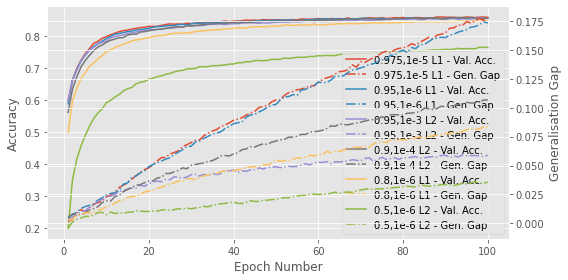

[0.8584177215189875, 0.857215189873418, 0.8562658227848107, 0.8567088607594937, 0.846455696202531, 0.7646202531645573]
[0.17874344672213482, 0.17352355784912826, 0.058924736256390886, 0.10696151743564275, 0.08364111951170633, 0.035643871998440546]


In [15]:
## Running an alternative set of experiments to try larger dropout incl probs

learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)


validation_accs = []
generalisation_gaps = []

combinationsToRun = [
    (0.975,1e-5,1),
    (0.95,1e-6,1),
    (0.95,1e-3,2),
    (0.9,1e-4,2),    
    (0.8,1e-6,1),
    (0.5,1e-6,2)
]


for comb in combinationsToRun:
    dropoutVal = comb[0]
    pen = None
    if comb[2] == 2:
        pen = L2Penalty(comb[1])
    else:
        pen = L1Penalty(comb[1])
        
    layers = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, pen, pen), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropoutVal, rng=rng),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, pen, pen), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropoutVal, rng=rng),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, pen, pen), 
        ReluLayer(),
        DropoutLayer(incl_prob=dropoutVal, rng=rng),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, pen, pen)
    ]
    
    model = MultipleLayerModel(layers)
    
    err_train, err_valid, acc_train, acc_valid = train_model_and_return_performances(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

    
    validation_accs.append(acc_valid)
    generalisation_gaps.append(err_valid - err_train)

    
val_accs = []
gen_gaps = []

for i in range(len(validation_accs)):
    val_accs.append(validation_accs[i][-1])
    gen_gaps.append(generalisation_gaps[i][-1])
    
    
epochNums = np.arange(1, num_epochs + 1) * stats_interval

fig_2 = plt.figure(figsize=(8,4))
ax_2 = fig_2.add_subplot(111)

ax_2.set_xlabel('Epoch Number')
ax_2.set_ylabel('Accuracy')

twin2 = ax_2.twinx()
twin2.set_ylabel('Generalisation Gap')

legend_handles = []
epochNums = np.arange(1, num_epochs + 1) * stats_interval

config_labels = [
    "0.975,1e-5 L1",
    "0.95,1e-6 L1",
    "0.95,1e-3 L2",
    "0.9,1e-4 L2",    
    "0.8,1e-6 L1",
    "0.5,1e-6 L2"
]

for i in range(len(combinationsToRun)):
    valAccLineLabel = str(config_labels[i]) + " - Val. Acc."
    genGapLineLabel = str(config_labels[i]) + " - Gen. Gap"
    
    p1, = ax_2.plot(epochNums, validation_accs[i], label=valAccLineLabel)
    p2, = twin2.plot(epochNums, generalisation_gaps[i], "-.", label=genGapLineLabel)
    
    legend_handles += [p1, p2]
    
    
ax_2.legend(handles=legend_handles)
fig_2.tight_layout()
fig_2.savefig('combinationFig.pdf')

plt.show()


print(val_accs)
print(gen_gaps)